In [2]:
setwd("/frazer01/projects/CARDIPS/analysis/cardiac_eqtls")

source("script/packages.R"  )
source("script/input_data.R")
source("script/functions.R" )
source("script/colors.R"    )


In [3]:
dir.create("pipeline/4.10.diffexp_eclip_enrichment"    , showWarnings = FALSE)
dir.create("pipeline/4.10.diffexp_eclip_enrichment/tmp", showWarnings = FALSE)


In [4]:
geneinfo_genes    = fread("pipeline/1.2.expression/gene_info.txt"   , sep = "\t", header = TRUE , data.table = FALSE)
geneinfo_isoforms = fread("pipeline/1.2.expression/isoform_info.txt", sep = "\t", header = TRUE , data.table = FALSE)


In [8]:
diffgene = fread(paste("pipeline/4.1.differential_expression", "diffexp.txt"     , sep = "/"), sep = "\t", header = TRUE, data.table = FALSE)
diffcell = fread(paste("pipeline/4.1.differential_expression", "diffexp_cell.txt", sep = "/"), sep = "\t", header = TRUE, data.table = FALSE)

diffgene_gene = diffgene[diffgene$type == "gene_tpm",]

diffgene = diffgene[diffgene$type == "isoform_use",]
diffcell = diffcell[diffcell$type == "isoform_use",]




In [9]:
eclip_folder = "/frazer01/home/tarthur/projects/CARDIPS/fine_mapping/analysis/garfield/bfiles/2020-10-26-rbp_annotation_prep/intersection_results"
eclip_in     = list.files(eclip_folder, pattern = "_merged_sorted.bed")
eclip_files  = data.frame(file  = paste(eclip_folder, eclip_in, sep = "/"), 
                          eclip = gsub("_merged_sorted.bed", "", eclip_in), 
                          rbp   = unlist(lapply(eclip_in, function(x){unlist(strsplit(x, "_"))[[1]]})),
                          cell  = unlist(lapply(eclip_in, function(x){unlist(strsplit(x, "_"))[[2]]}))
                         )

In [398]:
eclip_files

file,eclip,rbp,cell
<chr>,<chr>,<chr>,<chr>
/frazer01/home/tarthur/projects/CARDIPS/fine_mapping/analysis/garfield/bfiles/2020-10-26-rbp_annotation_prep/intersection_results/CPEB4_K562_merged_sorted.bed,CPEB4_K562,CPEB4,K562
/frazer01/home/tarthur/projects/CARDIPS/fine_mapping/analysis/garfield/bfiles/2020-10-26-rbp_annotation_prep/intersection_results/EIF4G2_K562_merged_sorted.bed,EIF4G2_K562,EIF4G2,K562
/frazer01/home/tarthur/projects/CARDIPS/fine_mapping/analysis/garfield/bfiles/2020-10-26-rbp_annotation_prep/intersection_results/EWSR1_K562_merged_sorted.bed,EWSR1_K562,EWSR1,K562
/frazer01/home/tarthur/projects/CARDIPS/fine_mapping/analysis/garfield/bfiles/2020-10-26-rbp_annotation_prep/intersection_results/FMR1_K562_merged_sorted.bed,FMR1_K562,FMR1,K562
/frazer01/home/tarthur/projects/CARDIPS/fine_mapping/analysis/garfield/bfiles/2020-10-26-rbp_annotation_prep/intersection_results/FUBP3_HepG2_merged_sorted.bed,FUBP3_HepG2,FUBP3,HepG2
/frazer01/home/tarthur/projects/CARDIPS/fine_mapping/analysis/garfield/bfiles/2020-10-26-rbp_annotation_prep/intersection_results/FUS_HepG2_merged_sorted.bed,FUS_HepG2,FUS,HepG2
/frazer01/home/tarthur/projects/CARDIPS/fine_mapping/analysis/garfield/bfiles/2020-10-26-rbp_annotation_prep/intersection_results/FUS_K562_merged_sorted.bed,FUS_K562,FUS,K562
/frazer01/home/tarthur/projects/CARDIPS/fine_mapping/analysis/garfield/bfiles/2020-10-26-rbp_annotation_prep/intersection_results/FXR2_HepG2_merged_sorted.bed,FXR2_HepG2,FXR2,HepG2
/frazer01/home/tarthur/projects/CARDIPS/fine_mapping/analysis/garfield/bfiles/2020-10-26-rbp_annotation_prep/intersection_results/FXR2_K562_merged_sorted.bed,FXR2_K562,FXR2,K562


# Intersect gene coordinates with eCLIP peaks

In [10]:
intersect_eclip = function(eclip, eclip_files)
{
    gene_bed  = "/frazer01/reference/private/Gencode.v34lift37/gene.bed"
    eclip_bed = eclip_files[eclip_files$eclip == eclip, "file"]
    command   = paste("bedtools", "intersect", "-wa", "-a", gene_bed, "-b", eclip_bed, "|", "cut -f 4")
    out       = system(command, intern = TRUE)
    
    return(out)
}

eclip2gene        = lapply(eclip_files$eclip, function(eclip){intersect_eclip(eclip, eclip_files)})
names(eclip2gene) = eclip_files$eclip


In [280]:
saveRDS(object = eclip2gene, file = "pipeline/4.10.diffexp_eclip_enrichment/eclip2gene.rds")

# Run enrichment for stage

In [11]:
diffgene_by_gene = as.data.frame(rbindlist(lapply(sort(unique(diffgene$gene_id)), function(gene_id)
{
    this = diffgene[diffgene$gene_id == gene_id,]
    return(this[which.max(abs(this$log2r)),])
})))

In [12]:
diffgene_by_gene[ diffgene_by_gene$log2r > max(diffgene_by_gene[ is.infinite(diffgene_by_gene$log2r) == FALSE, "log2r"]), "log2r"] = max(diffgene_by_gene[ is.infinite(diffgene_by_gene$log2r) == FALSE, "log2r"]) + 0.01
diffgene_by_gene[ diffgene_by_gene$log2r < min(diffgene_by_gene[ is.infinite(diffgene_by_gene$log2r) == FALSE, "log2r"]), "log2r"] = min(diffgene_by_gene[ is.infinite(diffgene_by_gene$log2r) == FALSE, "log2r"]) - 0.01


In [44]:
run_test = function(genes_in, genes_out, genes_eclip)
{
    out    = data.frame(c11 = length(intersect(genes_in , genes_eclip)),
                        c12 = length(setdiff  (genes_in , genes_eclip)),
                        c21 = length(intersect(genes_out, genes_eclip)),
                        c22 = length(setdiff  (genes_out, genes_eclip))
                       )
    
    totest = matrix(as.numeric(out[1,]), nrow = 2, byrow = TRUE)
    
    test = fisher.test(totest)
    out  = cbind(out, data.frame(estimate = test$estimate, ci1 = test$conf.int[[1]], ci2 = test$conf.int[[2]], pval = test$p.value))
    
    return(out)
     
}

run_eclip_enrichment = function(tissue1, tissue2, eclip, threshold, eclip_files, eclip2gene, diffgene)
{
    #message(paste(eclip, tissue1, tissue2, threshold))
    
    diffgene       = diffgene[diffgene$tissue1 == tissue1 & diffgene$tissue2 == tissue2,]
    gene_ids       = eclip2gene[[eclip]]
    
    genes1 = unique(diffgene[ diffgene$diffexp == TRUE  &  diffgene$log2r   >     threshold, "gene_id"])
    genes2 = unique(diffgene[ diffgene$diffexp == TRUE  &  diffgene$log2r   <    -threshold, "gene_id"])
    bg1    = unique(diffgene[ diffgene$diffexp == FALSE & !diffgene$gene_id %in%  genes1   , "gene_id"])
    bg2    = unique(diffgene[ diffgene$diffexp == FALSE & !diffgene$gene_id %in%  genes2   , "gene_id"])
    
    test1 = cbind(data.frame(tissue1 = tissue1, tissue2 = tissue2, test = tissue1, threshold = threshold), eclip_files[eclip_files$eclip == eclip, c("eclip", "rbp", "cell")], run_test(genes1, bg1   , gene_ids))
    test2 = cbind(data.frame(tissue1 = tissue1, tissue2 = tissue2, test = tissue2, threshold = threshold), eclip_files[eclip_files$eclip == eclip, c("eclip", "rbp", "cell")], run_test(genes2, bg2   , gene_ids))
    test3 = cbind(data.frame(tissue1 = tissue1, tissue2 = tissue2, test = "vs"   , threshold = threshold), eclip_files[eclip_files$eclip == eclip, c("eclip", "rbp", "cell")], run_test(genes1[!genes1 %in% genes2], genes2[!genes2 %in% genes1], gene_ids))
    
    return(rbind(test1, test2, test3))
}

tissue1 = "ipsc_cvpc"
tissue2 = "heart"
eclip   = "HNRNPL_HepG2"

stage_enrichment = as.data.frame(rbindlist(lapply(eclip_files$eclip, function(eclip)
#stage_enrichment = as.data.frame(rbindlist(lapply(c("HNRNPL_K562"), function(eclip)
{
    as.data.frame(rbindlist(lapply(sort(unique(diffgene$tissue1)), function(tissue1)
    {
        as.data.frame(rbindlist(lapply(sort(unique(diffgene$tissue2)), function(tissue2)
        {
            as.data.frame(rbindlist(lapply((0:12) / 2, function(threshold)
            {
                run_eclip_enrichment(tissue1, tissue2, eclip, threshold, eclip_files, eclip2gene, diffgene)
            })), stringsAsFactors = FALSE)
        })), stringsAsFactors = FALSE)
    })), stringsAsFactors = FALSE)    
})), stringsAsFactors = FALSE)

stage_enrichment      = stage_enrichment[stage_enrichment$tissue1 != stage_enrichment$tissue2,]
stage_enrichment$padj = p.adjust(stage_enrichment$pval, method = "BH")

fwrite(stage_enrichment, "pipeline/4.10.diffexp_eclip_enrichment/stage_enrichment.txt", sep = "\t", col.names = TRUE, row.names = FALSE)


## Test correspondence with gene expression

In [45]:
stage2exp = merge(geneinfo_genes[, c("gene_name", "gene_id")], stage_enrichment, by.x = "gene_name", by.y = "rbp")
stage2exp = merge(stage2exp, diffgene_gene[, c("gene_id", "tissue1", "tissue2", "beta", "pval", "qval", "diffexp", "log2r")], by = c("gene_id", "tissue1", "tissue2"), suffixes = c("_eclip", "_gene"))
stage2exp$log2estimate = log2(stage2exp$estimate)

In [278]:
fwrite(stage2exp, "pipeline/4.10.diffexp_eclip_enrichment/stage2exp.txt", sep = "\t", col.names = TRUE, row.names = FALSE)


In [46]:
suppressPackageStartupMessages(library(colorspace    ))


In [406]:
str(stage2exp)

length(unique(stage2exp$gene_name   ))
length(unique(stage2exp$eclip          ))


'data.frame':	7137 obs. of  23 variables:
 $ gene_id     : chr  "ENSG00000003756.17_8" "ENSG00000003756.17_8" "ENSG00000003756.17_8" "ENSG00000003756.17_8" ...
 $ tissue1     : chr  "heart" "heart" "heart" "heart" ...
 $ tissue2     : chr  "arteria" "arteria" "arteria" "arteria" ...
 $ gene_name   : chr  "RBM5" "RBM5" "RBM5" "RBM5" ...
 $ test        : chr  "heart" "arteria" "vs" "heart" ...
 $ threshold   : num  4 0.5 3 6 6 6 5 0.5 5.5 1 ...
 $ eclip       : chr  "RBM5_HepG2" "RBM5_HepG2" "RBM5_HepG2" "RBM5_HepG2" ...
 $ cell        : chr  "HepG2" "HepG2" "HepG2" "HepG2" ...
 $ c11         : int  23 265 27 6 1 6 4 122 9 123 ...
 $ c12         : int  140 2109 216 35 6 35 15 894 54 1003 ...
 $ c21         : int  962 756 7 974 977 1 976 157 973 881 ...
 $ c22         : int  8604 7044 55 8666 8682 6 8679 1244 8657 7964 ...
 $ estimate    : num  1.469 1.171 0.982 1.525 1.481 ...
 $ ci1         : num  0.8972 1.0056 0.3904 0.523 0.0322 ...
 $ ci2         : num  2.31 1.36 2.81 3.68 12.23 ...


[1] 39

[1] 59

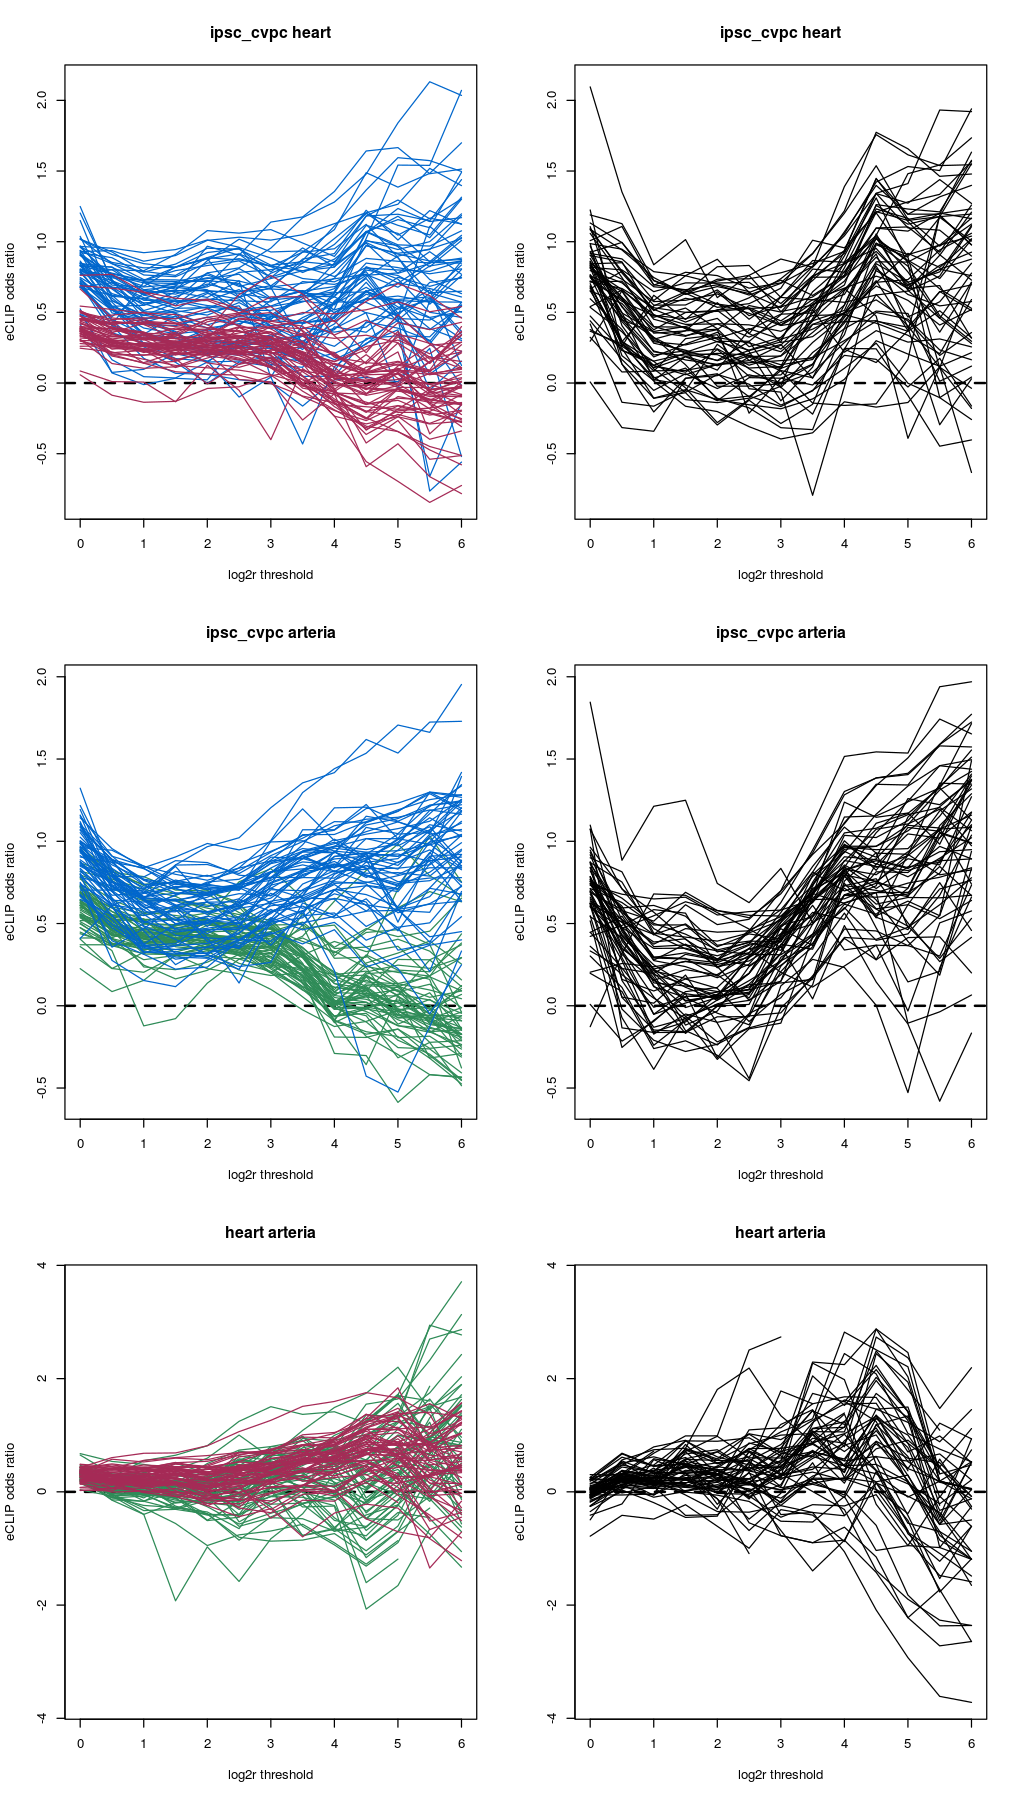

In [47]:
plot_enrichment = function(tissue1, tissue2, stage2exp)
{
    this = stage2exp[stage2exp$tissue1 == tissue1 & stage2exp$tissue2 == tissue2,]
    this = this[order(this$threshold),]

    plot(1,1, type = "n", xlim = range(this$threshold), ylim = range(this[is.infinite(this$log2estimate) == FALSE, "log2estimate"]), main = paste(tissue1, tissue2), xlab = "log2r threshold", ylab = "eCLIP odds ratio")
    abline (h = 0, lty = "dashed", lwd = 2)
    
    test2color = tissue2color3[tissue2color3$tissue %in% unique(this$test), c("tissue", "color")]
    test2color = rbind(test2color, data.frame(tissue = "vs", color = "#000000"))
    
    invisible(lapply(test2color$tissue, function(test)
    {
        if (test == "vs")
        {
            plot(1,1, type = "n", xlim = range(this$threshold), ylim = range(this[is.infinite(this$log2estimate) == FALSE, "log2estimate"]), main = paste(tissue1, tissue2), xlab = "log2r threshold", ylab = "eCLIP odds ratio")
            abline (h = 0, lty = "dashed", lwd = 2)
        }
        invisible(lapply(sort(unique(this$eclip)), function(eclip)
        {
            toplot = this[this$test == test & this$eclip == eclip, ]
            color  = test2color[test2color$tissue == test, "color"]
            

            lines(toplot$threshold, toplot$log2estimate, col = color, lwd = 1)
        }))
    }))
}

tissue1 = "ipsc_cvpc"
tissue2 = "heart"
eclip   = "HNRNPL_HepG2"
test    = "ipsc_cvpc"

options(repr.plot.width = 8.5, repr.plot.height = 15)
layout(matrix(1:6, nrow = 3, byrow = TRUE))

plot_enrichment("ipsc_cvpc", "heart"  , stage2exp)
plot_enrichment("ipsc_cvpc", "arteria", stage2exp)
plot_enrichment("heart"    , "arteria", stage2exp)


# Look for overlap between the eCLIP RBPs and the overexpressed RBPs in iPSC-CVPCs

In [113]:
msig = fread(cmd = 'grep -P "^GO_RNA_BINDING\t" /frazer01/reference/public/msigdb.v7.1/c5.mf.v7.1.symbols.gmt', sep = "\t", header = FALSE, data.table = FALSE)
msig = as.character(msig[,3:ncol(msig)])

rbps_msig = intersect(unique(eclip_files$rbp), msig)

message(paste("RBPs in eCLIP"                   , length(unique(eclip_files$rbp)), sep = " = "))
message(paste("RBPs in eCLIP and GO_RNA_BINDING", length(unique(rbps_msig      )), sep = " = "))

diffgene_rbp = diffgene_gene[ diffgene_gene$tissue1 == "ipsc_cvpc" & diffgene_gene$tissue2 == "heart" & diffgene_gene$gene_name %in% rbps_msig, c("gene_name", "beta", "pval", "qval", "log2r")]
diffgene_rbp = diffgene_rbp[order(diffgene_rbp$pval),]

diffgene_rbp

RBPs in eCLIP = 39

RBPs in eCLIP and GO_RNA_BINDING = 39



,gene_name,beta,pval,qval,log2r
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
2020,RBFOX2,2.09398903,1.414549e-84,2.884690e-80,3.3031541
18840,TAF15,1.92915062,4.679876e-84,9.543670e-80,1.8185214
8740,IGF2BP1,1.86611785,1.048781e-75,2.138780e-71,12.1583406
1517,RBM22,2.36507076,1.309652e-74,2.670774e-70,1.7522352
2992,FUBP3,2.07030130,1.333116e-68,2.718624e-64,1.9002733
672,PUM2,2.25113307,4.378397e-64,8.928865e-60,1.7862317
6211,IGF2BP3,2.02250152,2.815927e-63,5.742520e-59,8.9430480
4543,KHDRBS1,1.63481216,5.111198e-60,1.042327e-55,2.5640421
1111,IGF2BP2,1.08162880,3.952961e-58,8.061274e-54,3.6253610


# Find iPSC-CVPC- and adult-specific exons
- How? 

In [21]:
exon_info = fread("/frazer01/reference/private/Gencode.v34lift37/exon_info.txt", sep = "\t", header = TRUE , data.table = FALSE)


In [43]:
get_tissue_specific_exons = function(gene_id, tissue1, tissue2, diffgene, exon_info)
{
    #message(paste(tissue1, tissue2, gene_id))
    diffgene         = diffgene[ diffgene$tissue1 == tissue1 & diffgene$tissue2 == tissue2 & diffgene$gene_id == gene_id,]
    transcript_ids1  = diffgene[ diffgene$diffexp == TRUE & diffgene$log2r >=  2, "transcript_id"]
    transcript_ids2  = diffgene[ diffgene$diffexp == TRUE & diffgene$log2r <= -2, "transcript_id"]
    exon_info$tissue = ""
    
    if((length(transcript_ids1) > 0) & (length(transcript_ids2) > 0))
    {
        transcript_ids = c(transcript_ids1, transcript_ids2)
        exons          = lapply(transcript_ids, function(x){exon_info[exon_info$transcript_id == x,]})
        names(exons)   = transcript_ids
        
        exons1 = as.data.frame(rbindlist(exons[transcript_ids1]))
        exons2 = as.data.frame(rbindlist(exons[transcript_ids2]))
        
        exons1_unique = exons1[!exons1$exon_id %in% exons2$exon_id,]
        exons2_unique = exons2[!exons2$exon_id %in% exons1$exon_id,]
        
        if(nrow(exons1_unique) > 0)
        {
            exons1_unique$tissue = tissue1
        }else
        {
            exons1_unique = exon_info[exon_info$gene_id == "",]
        }
        
        if(nrow(exons2_unique) > 0)
        {
            exons2_unique$tissue = tissue2
        }else
        {
            exons2_unique = exon_info[exon_info$gene_id == "",]
        }
        
        out = rbind(exons1_unique, exons2_unique)
        
        return(out)
    }else
    {
        exon_info$tissue = ""
        return(exon_info[exon_info$gene_id == "",])
    }
}

exons_unique_by_tissue = function(tissue1, tissue2, diffgene, exon_info)
{
    gene_ids     = sort(unique(diffgene[ diffgene$diffexp == TRUE & abs(diffgene$log2r) >= 2, "gene_id"]))
    exons_unique = as.data.frame(rbindlist(lapply(gene_ids, function(gene_id)
    {
        get_tissue_specific_exons(gene_id, tissue1, tissue2, diffgene, exon_info)
    })), stringsAsFactors = FALSE)
    
    message(paste(tissue1, tissue2, length(unique(exons_unique$gene_id)), length(unique(exons_unique$transcript_id)), length(unique(exons_unique$exon_id))))
    
    return(exons_unique)
}


gene_id = "ENSG00000000457.14_7"
tissue1 = "ipsc_cvpc"
tissue2 = "heart"

#get_tissue_specific_exons(gene_id, tissue1, tissue2, diffgene, exon_info)

exons1 = exons_unique_by_tissue("ipsc_cvpc", "heart"  , diffgene, exon_info)
exons2 = exons_unique_by_tissue("ipsc_cvpc", "arteria", diffgene, exon_info)
exons3 = exons_unique_by_tissue("heart"    , "arteria", diffgene, exon_info)

exons1$tissue1 = "ipsc_cvpc"
exons1$tissue2 = "heart"
exons2$tissue1 = "ipsc_cvpc"
exons2$tissue2 = "arteria"
exons3$tissue1 = "heart"
exons3$tissue2 = "arteria"

exons_unique = rbind(exons1, exons2, exons3)

fwrite(exons_unique, "pipeline/4.10.diffexp_eclip_enrichment/exons_unique.txt", sep = "\t", col.names = TRUE, row.names = FALSE)




ipsc_cvpc heart 496 1202 8211

ipsc_cvpc arteria 590 1511 9205

heart arteria 83 220 1225



## Get the sequence of the donor and acceptor site of each exon

In [62]:
toseq = unique(exons_unique[,colnames(exon_info)])

toseq$donor_from    = 0
toseq$donor_to      = 0
toseq$acceptor_from = 0
toseq$acceptor_to   = 0

toseq_p = toseq[toseq$strand == "+",]
toseq_n = toseq[toseq$strand == "-",]

toseq_p$donor_from    = toseq_p$end
toseq_p$donor_to      = toseq_p$end   + 100
toseq_p$acceptor_from = toseq_p$start - 100
toseq_p$acceptor_to   = toseq_p$start

toseq_n$donor_from    = toseq_n$start - 100
toseq_n$donor_to      = toseq_n$start
toseq_n$acceptor_from = toseq_n$end
toseq_n$acceptor_to   = toseq_n$end   + 100

toseq = rbind(toseq_p, toseq_n)
toseq = toseq[order(toseq$chrom, toseq$start, toseq$end),]

toseq_donor    = toseq[,c("chrom", "donor_from"   , "donor_to"   , "exon_id", "exon_number", "strand")]
toseq_acceptor = toseq[,c("chrom", "acceptor_from", "acceptor_to", "exon_id", "exon_number", "strand")]

colnames(toseq_donor   ) = c("chrom", "from", "to", "id", "score", "strand")
colnames(toseq_acceptor) = c("chrom", "from", "to", "id", "score", "strand")

toseq_donor      = toseq_donor   [order(toseq_donor   $chrom, toseq_donor   $from, toseq_donor   $to),]
toseq_acceptor   = toseq_acceptor[order(toseq_acceptor$chrom, toseq_acceptor$from, toseq_acceptor$to),]

bedfile_donor    = paste(getwd(), "pipeline/4.10.diffexp_eclip_enrichment/tmp/donor_site.bed"   , sep = "/")
bedfile_acceptor = paste(getwd(), "pipeline/4.10.diffexp_eclip_enrichment/tmp/accpetor_site.bed", sep = "/")

fwrite(toseq_donor   , bedfile_donor   , sep= "\t", col.names = FALSE, row.names = FALSE)
fwrite(toseq_acceptor, bedfile_acceptor, sep= "\t", col.names = FALSE, row.names = FALSE)



In [68]:
fasta_donor    = paste(getwd(), "pipeline/4.10.diffexp_eclip_enrichment/tmp/donor_site.fa"   , sep = "/")
fasta_acceptor = paste(getwd(), "pipeline/4.10.diffexp_eclip_enrichment/tmp/accpetor_site.fa", sep = "/")

command_donor    = paste("bedtools", "getfasta", "-s", "-tab", "-fi", "/frazer01/reference/public/hg19/hg19.fa", "-bed", bedfile_donor   , ">", fasta_donor   )
command_acceptor = paste("bedtools", "getfasta", "-s", "-tab", "-fi", "/frazer01/reference/public/hg19/hg19.fa", "-bed", bedfile_acceptor, ">", fasta_acceptor)

system(command_donor   )
system(command_acceptor)


In [105]:
read_fasta = function(fasta, bed)
{
    inseq              = fread(fasta, sep = "\t", header = FALSE, data.table = FALSE)
    indata             = fread(bed  , sep = "\t", header = FALSE, data.table = FALSE)
    colnames(inseq )   = c("region", "seq")
    colnames(indata)   = c("chrom", "from", "to", "exon_id", "exon_number", "strand")
    indata$exon_number = NULL
    inseq$seq          = toupper(inseq$seq)

    inseq = as.data.frame(rbindlist(lapply(inseq$seq, function(x)
    {
        out = as.data.frame(t(as.matrix(unlist(strsplit(x, "")))))

        return(out)
    })), stringsAsFactors = FALSE)
    
    colnames(inseq  ) = paste("pos", 1:ncol(inseq), sep = "_")
    outdata           = unique(cbind(indata, inseq))
    
    return(outdata)
}

seq_donor    = read_fasta(fasta_donor   , bedfile_donor   )
seq_acceptor = read_fasta(fasta_acceptor, bedfile_acceptor)


In [100]:
colnames(seq_donor   )[2:3] = c("donor_from"   , "donor_to"   )
colnames(seq_acceptor)[2:3] = c("acceptor_from", "acceptor_to")

exon2seq = toseq[,c("chrom", "start", "end", "exon_id", "strand", "transcript_id", "donor_from"   , "donor_to", "acceptor_from", "acceptor_to")]
exon2seq = merge(exons_unique, exon2seq    , by = c("chrom", "start"        , "end"        , "exon_id", "strand", "transcript_id"))
exon2seq = merge(exon2seq    , seq_donor   , by = c("chrom", "donor_from"   , "donor_to"   , "exon_id", "strand"))
exon2seq = merge(exon2seq    , seq_acceptor, by = c("chrom", "acceptor_from", "acceptor_to", "exon_id", "strand"), suffixes = c("_donor", "_acceptor"))


# Test donor and acceptor sequences for each tissue pair

In [138]:
calculate_conseensus_seq = function(inseq)
{
    seq100 = as.data.frame(rbindlist(lapply(1:ncol(inseq), function(ii)
    {
        out = data.frame(A = nrow(inseq[inseq[,ii] == "A", ]),
                         C = nrow(inseq[inseq[,ii] == "C", ]),
                         G = nrow(inseq[inseq[,ii] == "G", ]),
                         T = nrow(inseq[inseq[,ii] == "T", ])
                        )
        #out[1,] = out[1,] / rowSums(out)
        
        return(out)
    })), stringsAsFactors = FALSE)
}

totest         = unique(exon2seq[,c("tissue1", "tissue2", "tissue")])
totest$name    = paste(totest$tissue1, totest$tissue2, totest$tissue, sep = ".")
consensus_list = lapply(1:nrow(totest), function(ii)
{
    tissue1 = totest[ii, "tissue1"]
    tissue2 = totest[ii, "tissue2"]
    tissue  = totest[ii, "tissue" ]
    this    = exon2seq[ exon2seq$tissue1 == tissue1 & exon2seq$tissue2 == tissue2 & exon2seq$tissue == tissue,]
    
    consensus_donor    = calculate_conseensus_seq(this[, paste("pos", 1:100, "donor"   , sep = "_")])
    consensus_acceptor = calculate_conseensus_seq(this[, paste("pos", 1:100, "acceptor", sep = "_")])
    
    consensus = list(donor = consensus_donor, acceptor = consensus_acceptor)
    
    return(consensus)
    
})

names(consensus_list) = totest$name

saveRDS(object = consensus_list, file = "pipeline/4.10.diffexp_eclip_enrichment/consensus_list.rds")

In [140]:
test_fisher = function(ii, nuc, seq1, seq2)
{
    out   = data.frame(x11 = seq1[ii, nuc], 
                       x12 = sum(seq1[ii, !colnames(seq1) %in% c(nuc)]),
                       x21 = seq2[ii, nuc], 
                       x22 = sum(seq2[ii, !colnames(seq2) %in% c(nuc)])
                      )
    
    totest = matrix(as.numeric(out[1,]), nrow = 2, byrow = TRUE)
    test   = fisher.test(totest)
    out    = cbind(out, data.frame(pos = ii, nuc = nuc, estimate = test$estimate, ci1 = test$conf.int[[1]], ci2 = test$conf.int[[2]], pval = test$p.value))

    return(out)
}

test_seq = function(tissue1, tissue2, what_seq, totest, consensus_list)
{
    totest  = totest[totest$tissue1 == tissue1 & totest$tissue2 == tissue2,]
    seq1    = consensus_list[[paste(tissue1, tissue2, tissue1, sep = ".")]][[what_seq]]
    seq2    = consensus_list[[paste(tissue1, tissue2, tissue2, sep = ".")]][[what_seq]]
    test    = as.data.frame(rbindlist(lapply(colnames(seq1), function(nuc)
    {
        as.data.frame(rbindlist(lapply(1:nrow(seq1), function(ii)
        {
            test_fisher(ii, nuc, seq1, seq2)
        })), stringsAsFactors = FALSE)
    })), stringsAsFactors = FALSE)
    
    test$seq     = what_seq
    test$tissue1 = tissue1
    test$tissue2 = tissue2
    test         = test[,c("tissue1", "tissue2", "seq", "nuc", "pos", "x11", "x12", "x21", "x22", "estimate", "ci1", "ci2", "pval")]
    
    return(test)
}

tissues = unique(totest[,c("tissue1", "tissue2")])
tests   = as.data.frame(rbindlist(lapply(c("donor", "acceptor"), function(what_seq)
{
    as.data.frame(rbindlist(lapply(1:nrow(tissues), function(tt)
    {
        tissue1 = tissues[tt, "tissue1"]
        tissue2 = tissues[tt, "tissue2"]
        out     = test_seq(tissue1, tissue2, what_seq, totest, consensus_list)
        
        return(out)
    })), stringsAsFactors = FALSE)
})), stringsAsFactors = FALSE)


fwrite(tests, "pipeline/4.10.diffexp_eclip_enrichment/tests_consensus_sequence.txt", sep = "\t", col.names = TRUE, row.names = FALSE)




In [154]:
tests$log2estimate =  log2 (tests$estimate)
tests$log2ci1      =  log2 (tests$ci1     )
tests$log2ci2      =  log2 (tests$ci2     )
tests$logp         = -log10(tests$pval    )

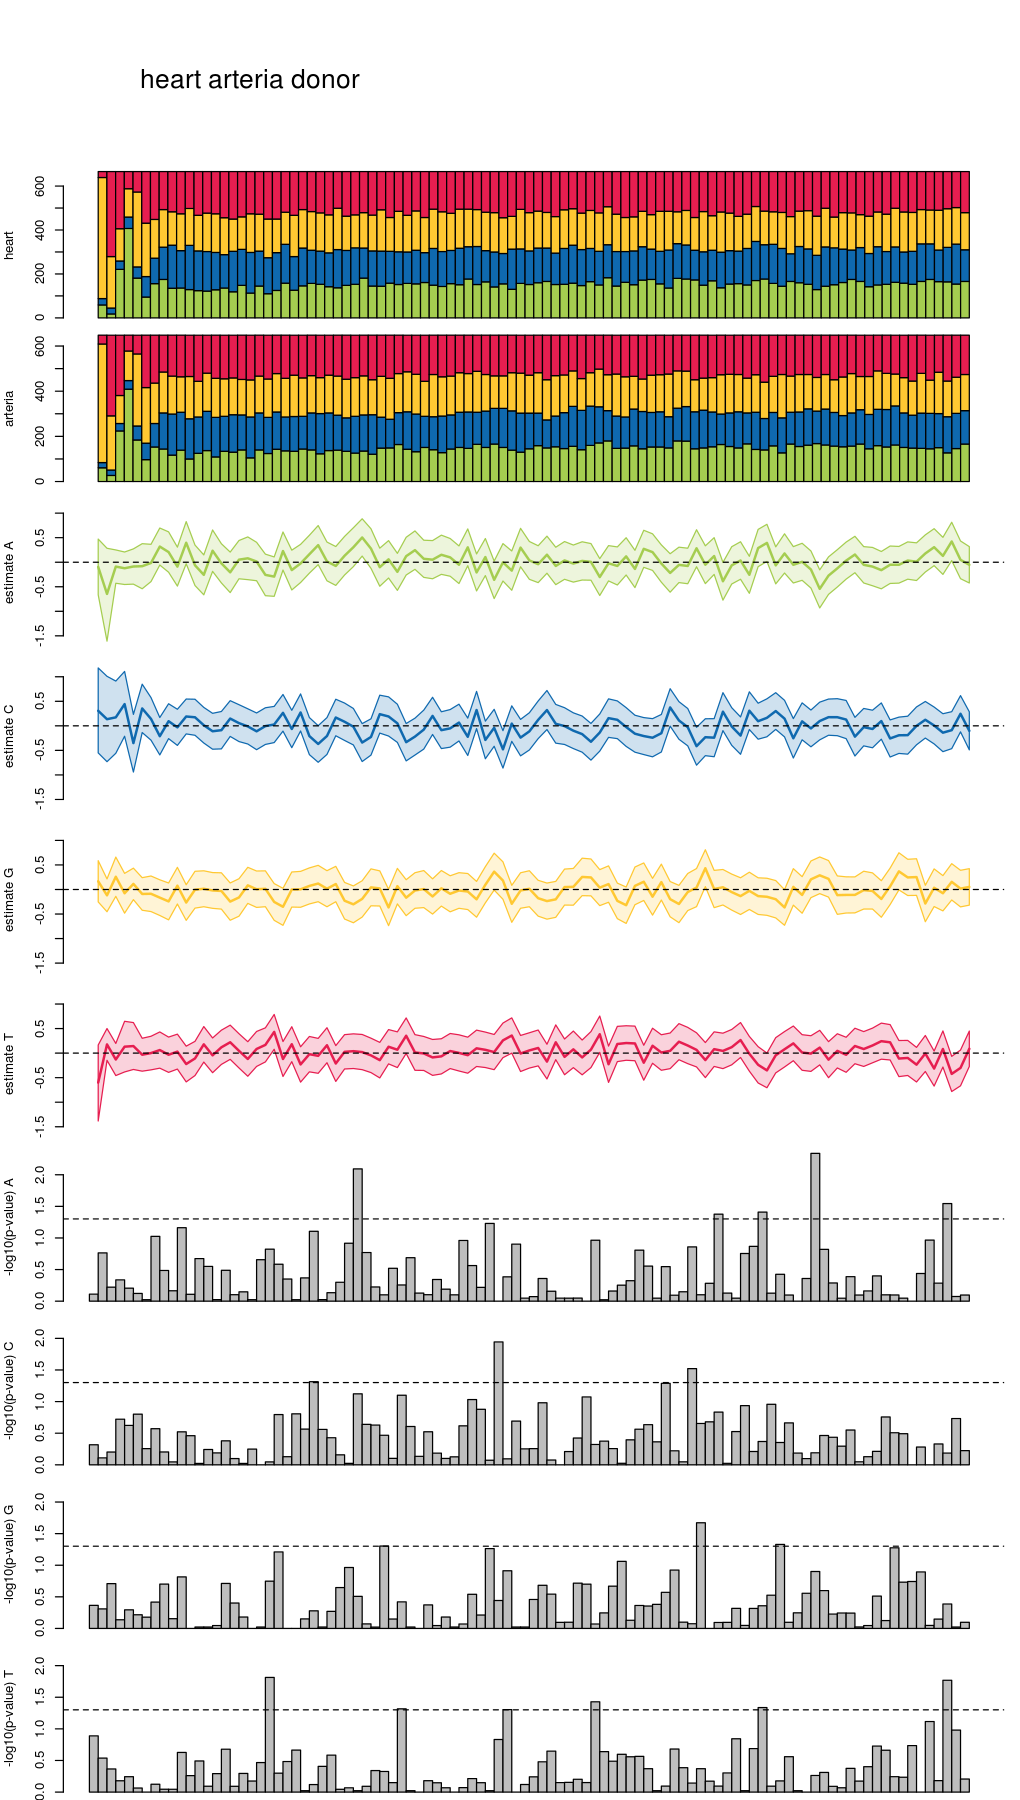

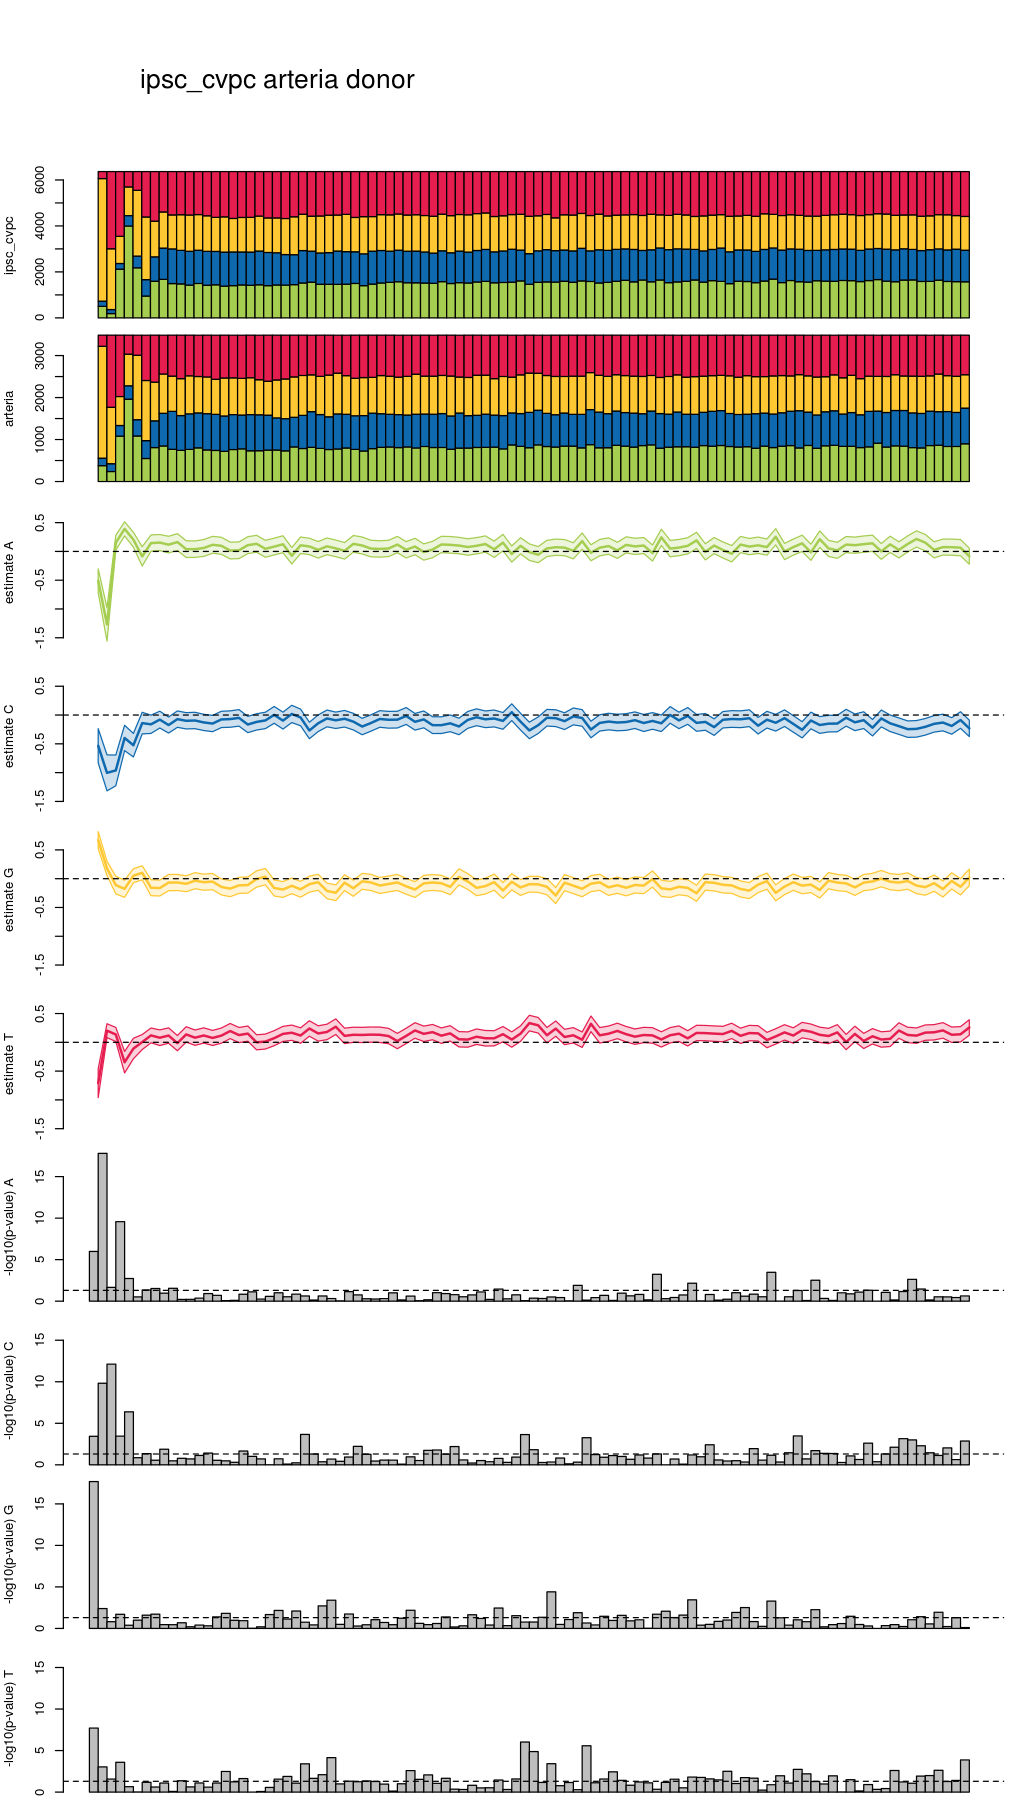

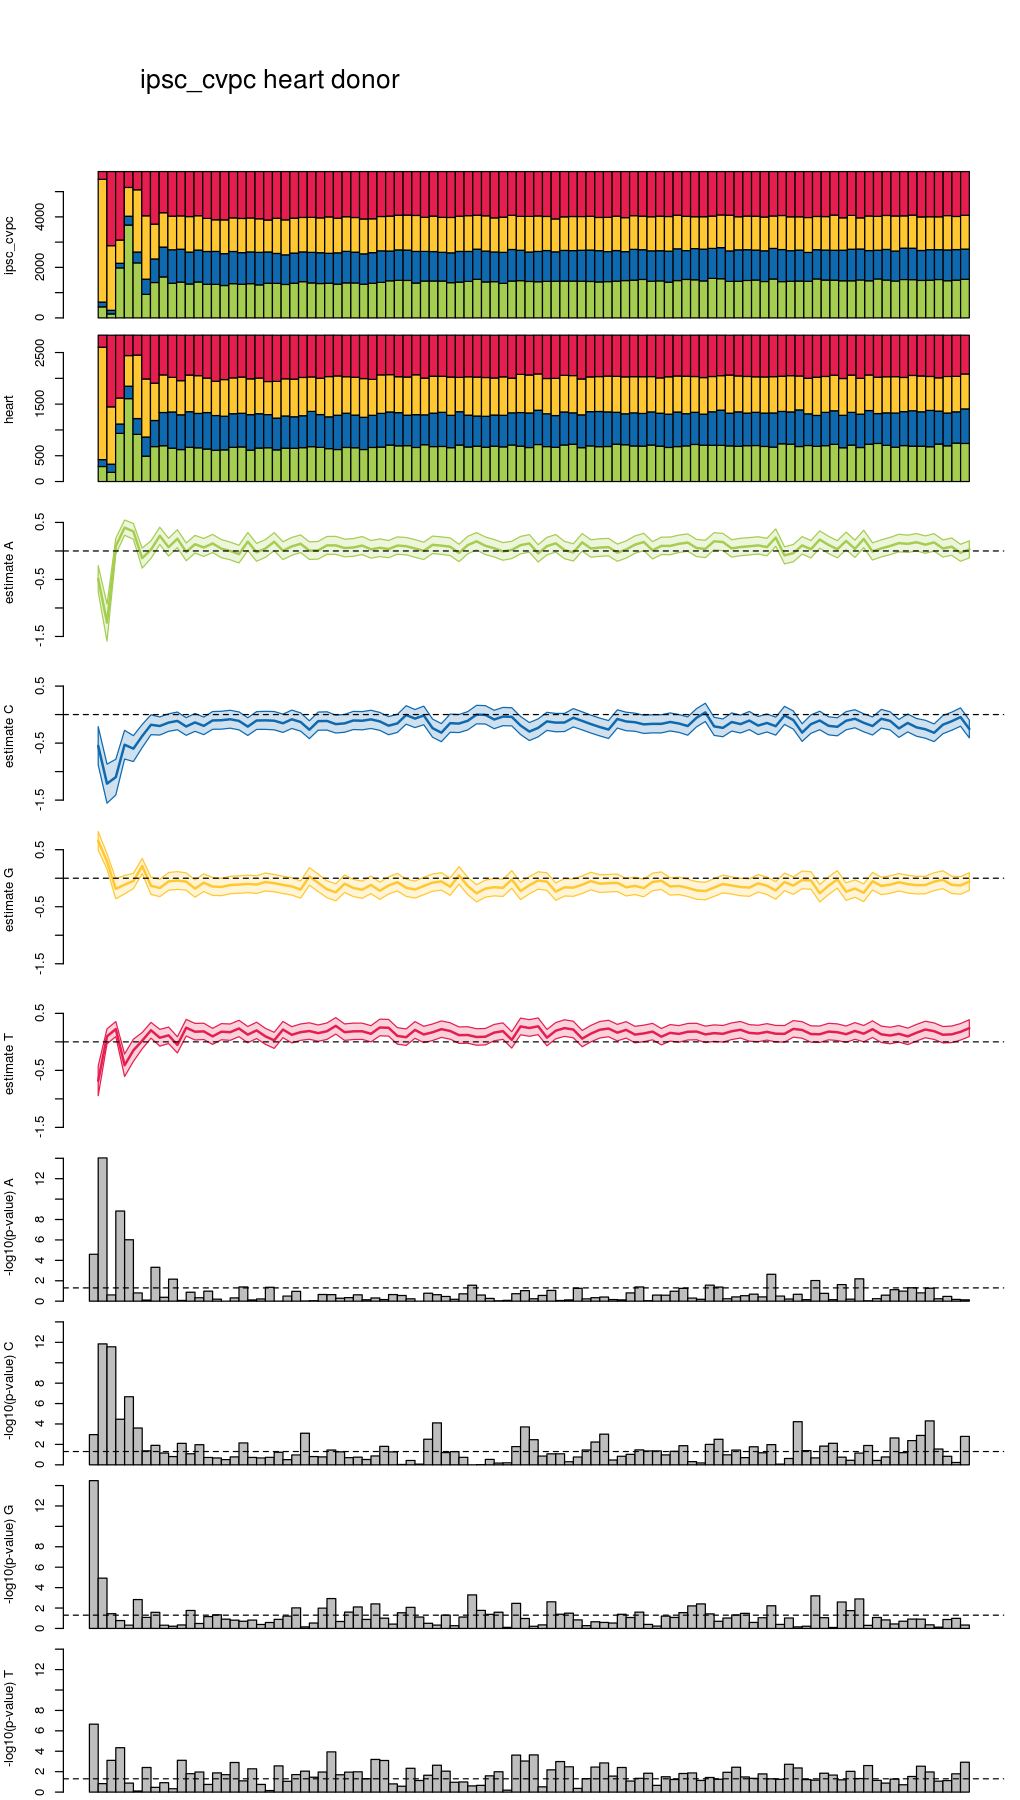

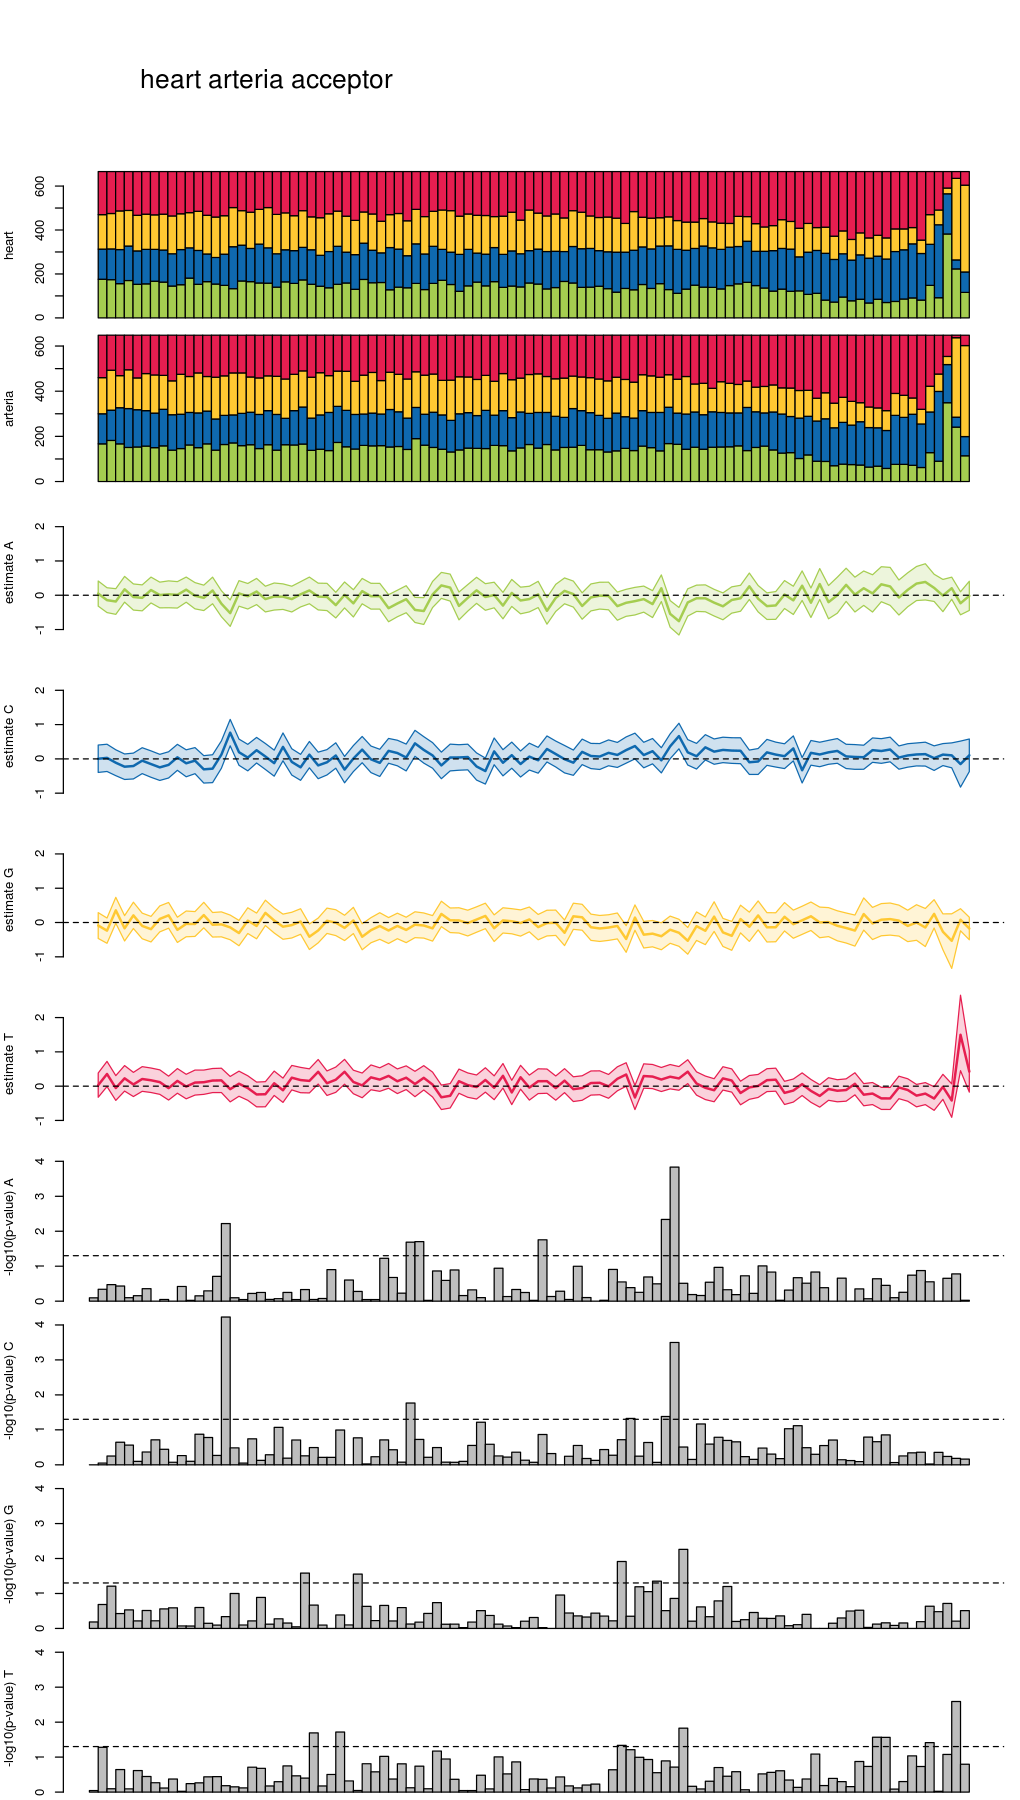

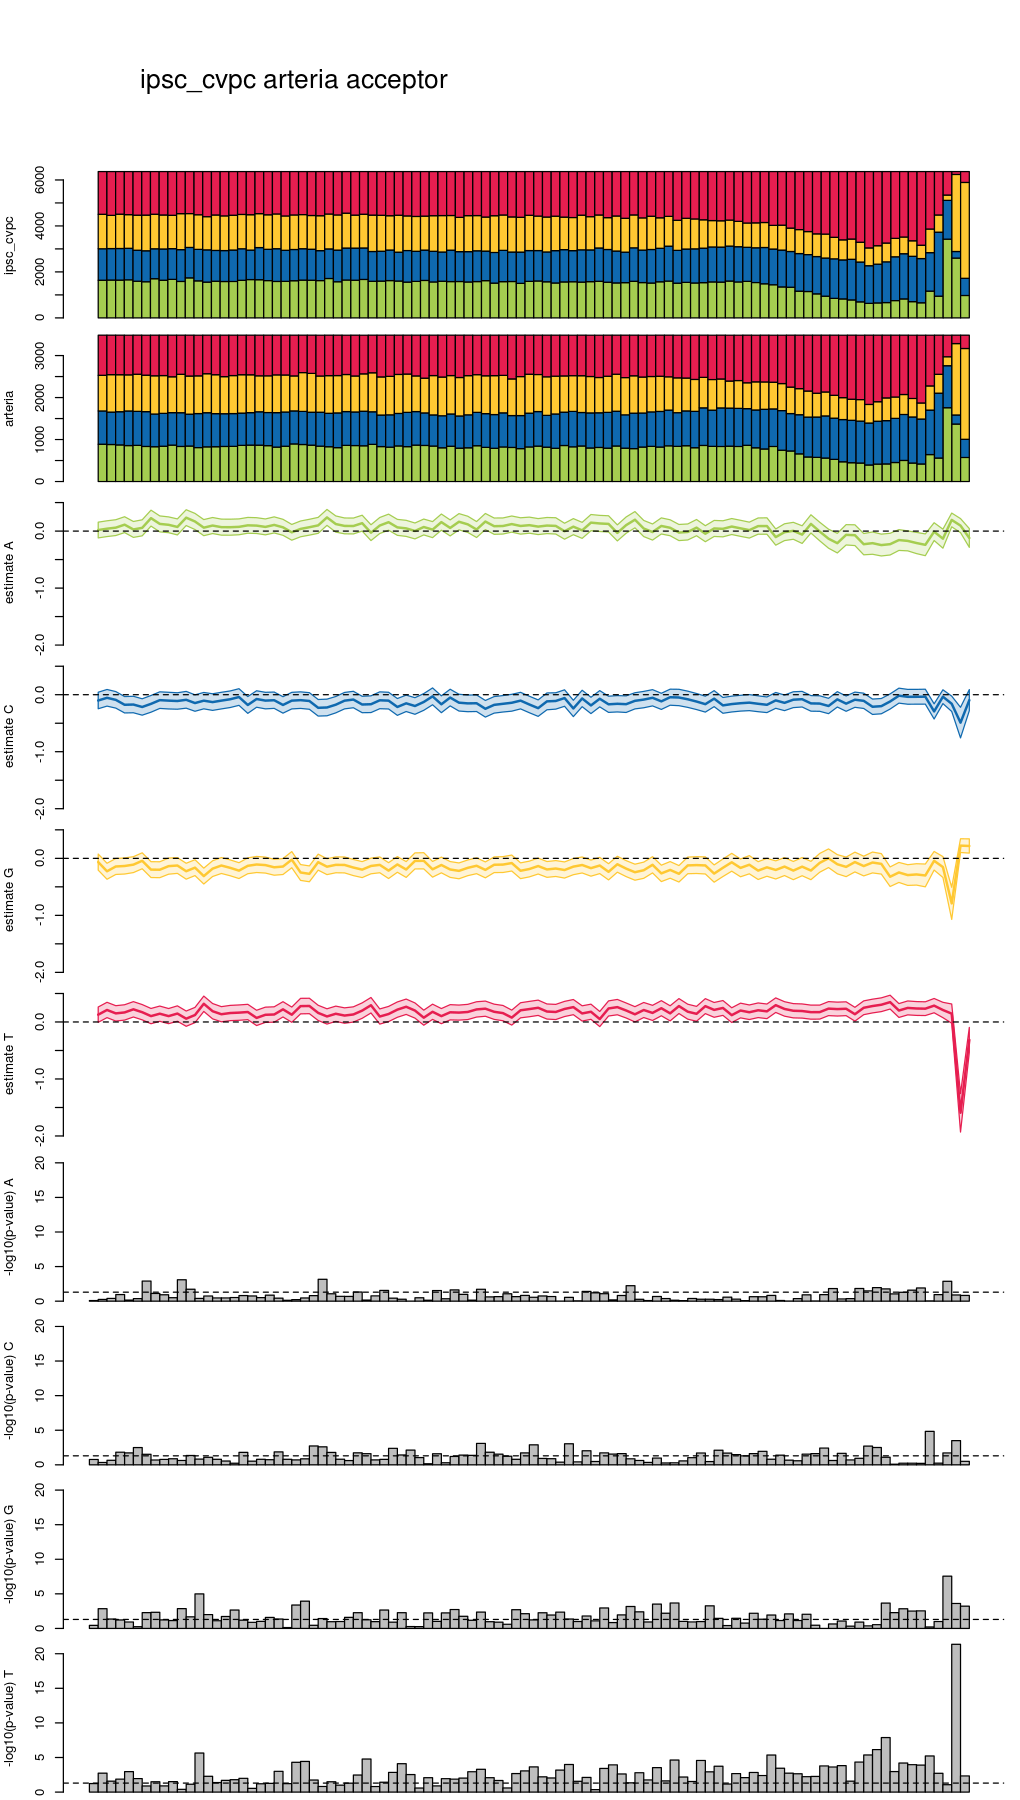

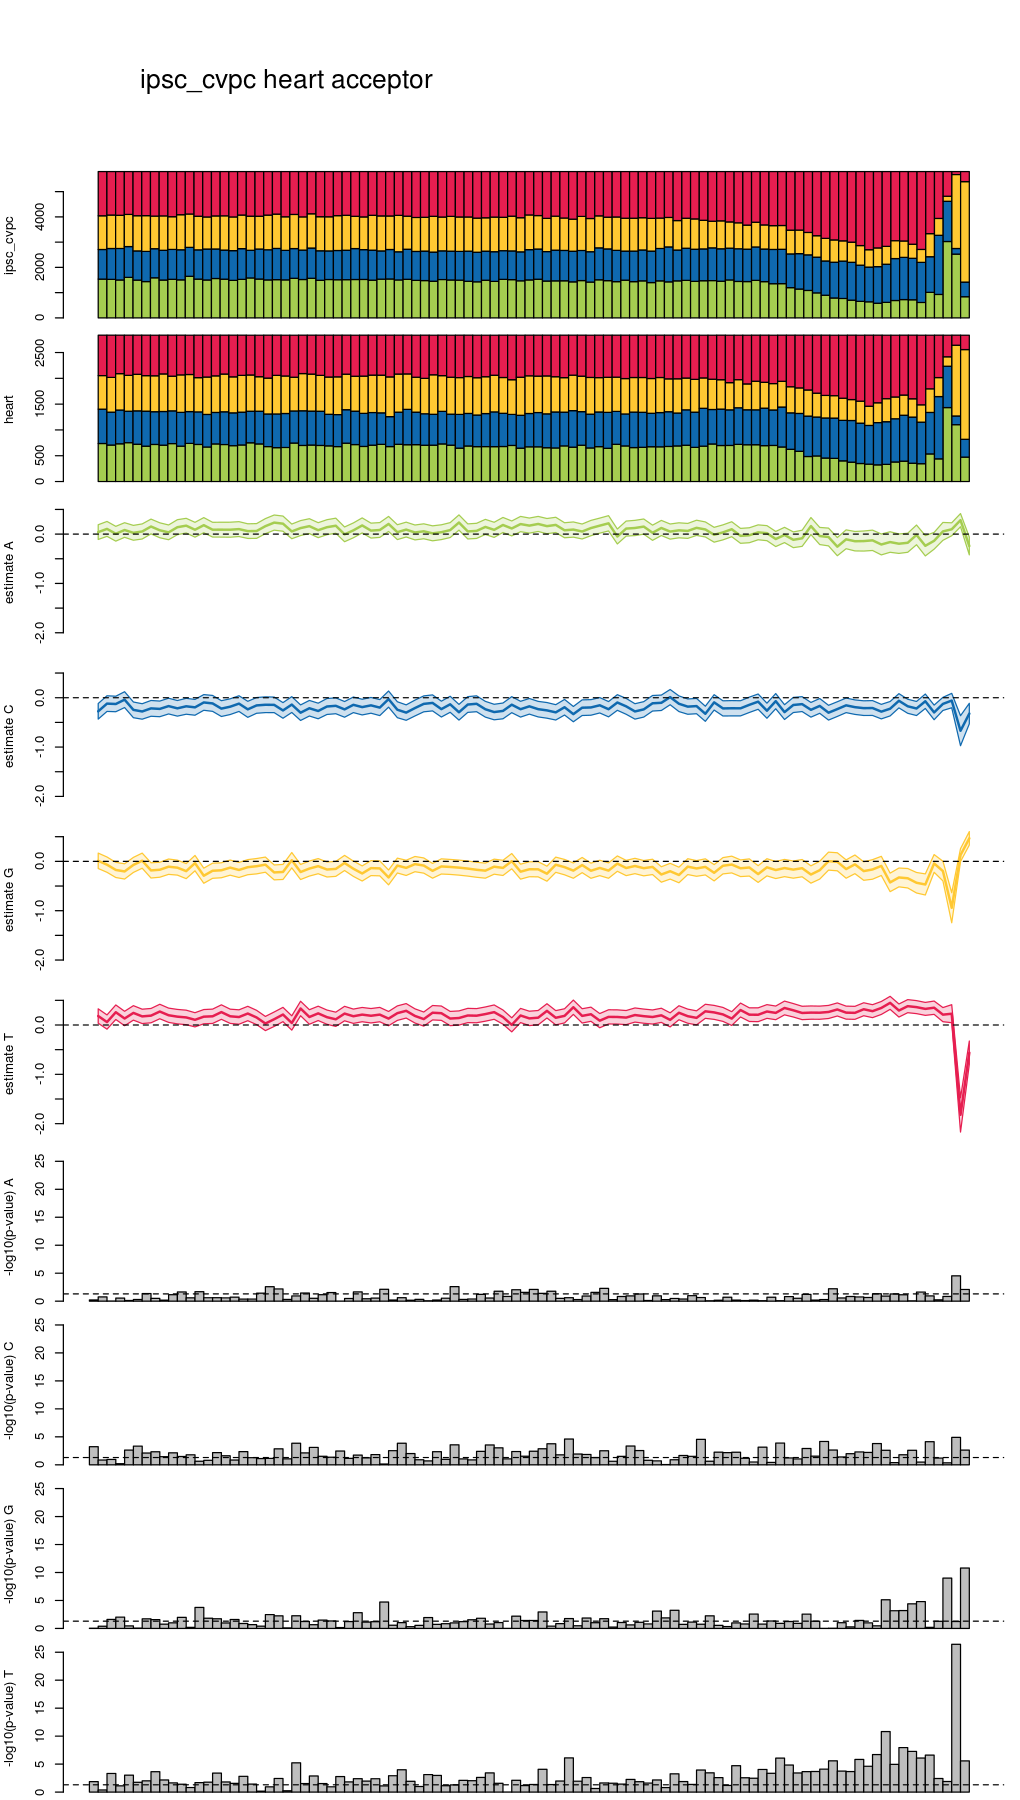

In [157]:
plot_seqs = function(tissue1, tissue2, what_seq)
{
    options(repr.plot.width = 8.5, repr.plot.height = 15)
    layout(cbind(1:11))
    
    par(mar = c(0,0,0,0))
    plot(1,1, type = "n", xlim = c(0,1), ylim = c(0,1), axes = FALSE, ylab = "", xlab = "")
    
    text(x = 0.1, y = 0.5, labels = paste(tissue1, tissue2, what_seq), cex = 2, pos = 4)

    base2col = data.frame(base = c("A", "C", "G", "T"), color = c("#a5cd50", "#0f69af", "#ffc832", "#e61e50"))

    par(mar = c(0.5,4,0.5,1))
    barplot(t(as.matrix(consensus_list[[paste(tissue1, tissue2, tissue1, sep = ".")]][[what_seq]])), col = base2col$color, width = 1, space = 0, ylab = tissue1)
    barplot(t(as.matrix(consensus_list[[paste(tissue1, tissue2, tissue2, sep = ".")]][[what_seq]])), col = base2col$color, width = 1, space = 0, ylab = tissue2)

    invisible(lapply(base2col$base, function(x)
    {
        test  = tests[tests$seq == what_seq & tests$tissue1 == tissue1 & tests$tissue2 == tissue2 & tests$nuc == x,]
        color = base2col[ base2col$base == x, "color"]
        ylims = tests[tests$seq == what_seq & tests$tissue1 == tissue1 & tests$tissue2 == tissue2,]
        ylims = range(c(ylims$log2ci1, ylims$log2ci2))

        plot(1,1, type = "n", xlim = range(test$pos), ylim = ylims, axes = FALSE, ylab = paste("estimate", x))
        axis(2)

        polygon(x = c(test$pos, rev(test$pos)), y = c(test$log2ci1, rev(test$log2ci2)), col = paste(color, "33", sep = ""), border = color)
        lines  (x =   test$pos                , y =   test$log2estimate               , col =       color                 , lwd    = 2)

        abline(h = 0, , lty = "dashed")
    }))

    invisible(lapply(base2col$base, function(x)
    {
        test  = tests[tests$seq == what_seq & tests$tissue1 == tissue1 & tests$tissue2 == tissue2 & tests$nuc == x,]
        color = base2col[ base2col$base == x, "color"]
        ylims = tests[tests$seq == what_seq & tests$tissue1 == tissue1 & tests$tissue2 == tissue2,]
        ylims = c(0, max(ylims$logp))

        barplot(test$logp, xlim = range(test$pos), ylim = ylims, axes = FALSE, ylab = paste("-log10(p-value)", x), width = 1, space = 0)
        axis(2)
        abline(h = -log10(0.05), lty = "dashed")
    }))


}

invisible(lapply(c("donor", "acceptor"), function(what_seq)
{
    invisible(lapply(1:nrow(tissues), function(tt)
    {
        tissue1 = tissues[tt, "tissue1"]
        tissue2 = tissues[tt, "tissue2"]
        
        plot_seqs(tissue1, tissue2, what_seq)
    }))
}))



tissue1 = "ipsc_cvpc"
tissue2 = "heart"
what_seq = "acceptor"



In [141]:
str(tests)

'data.frame':	2400 obs. of  13 variables:
 $ tissue1 : chr  "heart" "heart" "heart" "heart" ...
 $ tissue2 : chr  "arteria" "arteria" "arteria" "arteria" ...
 $ seq     : chr  "donor" "donor" "donor" "donor" ...
 $ nuc     : chr  "A" "A" "A" "A" ...
 $ pos     : int  1 2 3 4 5 6 7 8 9 10 ...
 $ x11     : int  59 18 221 407 181 95 156 175 135 136 ...
 $ x12     : int  607 648 445 259 485 571 510 491 531 530 ...
 $ x21     : int  61 27 224 409 184 97 153 144 117 139 ...
 $ x22     : int  587 621 424 239 464 551 495 504 531 509 ...
 $ estimate: num  0.935 0.639 0.94 0.918 0.941 ...
 $ ci1     : num  0.631 0.328 0.743 0.73 0.734 ...
 $ ci2     : num  1.39 1.22 1.19 1.15 1.21 ...
 $ pval    : num  0.774 0.172 0.6 0.46 0.623 ...


In [128]:
tail(consensus_list[["ipsc_cvpc.heart.ipsc_cvpc"]][["acceptor"]])
tail(consensus_list[["ipsc_cvpc.heart.heart"    ]][["acceptor"]])


,A,C,G,T
,<int>,<int>,<int>,<int>
95,611,1587,513,3084
96,1012,1411,913,2459
97,928,2344,667,1856
98,3026,1592,201,976
99,2526,222,2929,118
100,839,578,3979,399


,A,C,G,T
,<int>,<int>,<int>,<int>
95,346,805,336,1349
96,535,804,458,1039
97,440,1207,368,821
98,1433,802,183,418
99,1102,169,1371,194
100,473,345,1739,279


# stage-specific isoforms: 
- have they different length?
- are they more likely to harbor functional motifs?
- are they more likely to be associated with NMD?
- look at TTN and SCN5A

## Length

[[1]]
   gene_id           length.mean     length.sd          length1       
 Length:496         Min.   : 317   Min.   :  13.44   Min.   :  214.0  
 Class :character   1st Qu.:1718   1st Qu.: 860.94   1st Qu.:  935.8  
 Mode  :character   Median :2582   Median :1560.32   Median : 2189.0  
                    Mean   :2869   Mean   :1820.20   Mean   : 2771.6  
                    3rd Qu.:3660   3rd Qu.:2435.13   3rd Qu.: 3785.5  
                    Max.   :9850   Max.   :8484.57   Max.   :21726.0  
    length2            delta                z1                 z2         
 Min.   :  291.0   Min.   :-15945.0   Min.   :-1.77128   Min.   :-1.9294  
 1st Qu.:  851.5   1st Qu.:  -967.9   1st Qu.:-0.70711   1st Qu.:-0.7696  
 Median : 1890.8   Median :   169.5   Median :-0.15090   Median :-0.4050  
 Mean   : 2494.5   Mean   :   277.1   Mean   :-0.06463   Mean   :-0.1869  
 3rd Qu.: 3183.2   3rd Qu.:  1612.2   3rd Qu.: 0.69183   3rd Qu.: 0.4988  
 Max.   :22028.0   Max.   : 18651.0   Max.   : 

[[1]]
   gene_id           length.mean     length.sd          length1       
 Length:590         Min.   : 477   Min.   :  13.44   Min.   :  226.0  
 Class :character   1st Qu.:1650   1st Qu.: 834.26   1st Qu.:  887.8  
 Mode  :character   Median :2416   Median :1409.48   Median : 1961.5  
                    Mean   :2700   Mean   :1703.89   Mean   : 2554.7  
                    3rd Qu.:3319   3rd Qu.:2216.38   3rd Qu.: 3419.8  
                    Max.   :9850   Max.   :8484.57   Max.   :20987.0  
    length2            delta                 z1                 z2         
 Min.   :  283.0   Min.   :-20361.00   Min.   :-1.78818   Min.   :-1.8111  
 1st Qu.:  860.2   1st Qu.:  -960.50   1st Qu.:-0.71160   1st Qu.:-0.7151  
 Median : 1944.0   Median :    51.75   Median :-0.14686   Median :-0.2663  
 Mean   : 2433.8   Mean   :   120.91   Mean   :-0.09463   Mean   :-0.1239  
 3rd Qu.: 3194.6   3rd Qu.:  1331.50   3rd Qu.: 0.60896   3rd Qu.: 0.5138  
 Max.   :22028.0   Max.   : 16781.00   Ma

[[1]]
   gene_id           length.mean       length.sd          length1     
 Length:83          Min.   : 696.5   Min.   :  84.31   Min.   :  272  
 Class :character   1st Qu.:2030.7   1st Qu.:1032.63   1st Qu.: 1237  
 Mode  :character   Median :3008.3   Median :1606.82   Median : 2080  
                    Mean   :3072.6   Mean   :1919.31   Mean   : 2822  
                    3rd Qu.:4051.2   3rd Qu.:2334.80   3rd Qu.: 3991  
                    Max.   :9067.5   Max.   :6766.59   Max.   :10509  
    length2          delta                z1                 z2         
 Min.   :  450   Min.   :-11641.0   Min.   :-1.70080   Min.   :-1.8323  
 1st Qu.: 1300   1st Qu.: -1833.5   1st Qu.:-0.70711   1st Qu.:-0.3221  
 Median : 3430   Median :  -338.0   Median :-0.40706   Median : 0.4238  
 Mean   : 3493   Mean   :  -671.1   Mean   :-0.09873   Mean   : 0.2125  
 3rd Qu.: 4926   3rd Qu.:   445.2   3rd Qu.: 0.55490   3rd Qu.: 0.7517  
 Max.   :14994   Max.   :  7407.0   Max.   : 1.59971   Max.

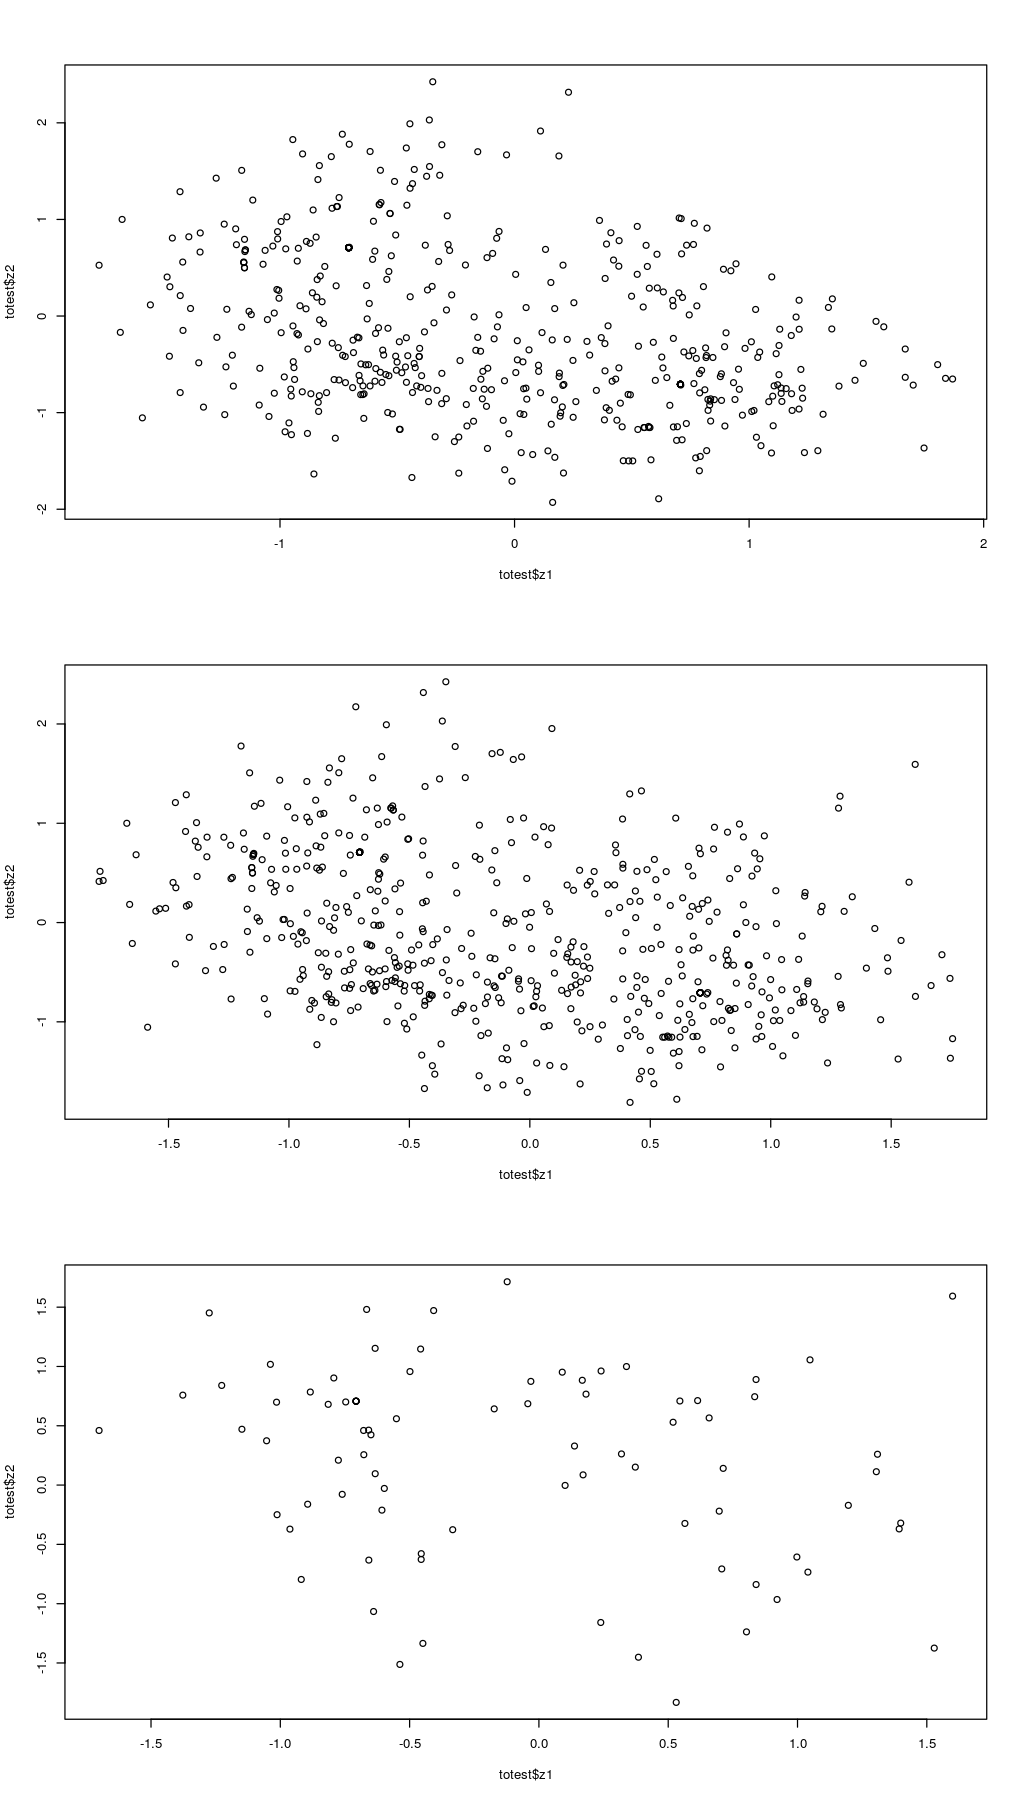

In [277]:
test_isoform_length = function(tissue1, tissue2, diffgene, exon_info)
{
    exon_info$length = exon_info$end - exon_info$start
    diffgene         = diffgene[ diffgene$tissue1 == tissue1 & diffgene$tissue2 == tissue2,]
    ingenes          = unique(intersect(diffgene[ diffgene$diffexp == TRUE & diffgene$log2r >  2, "gene_id"], diffgene[ diffgene$diffexp == TRUE & diffgene$log2r < -2, "gene_id"]))
    len0             = aggregate(length ~ transcript_id + gene_id, data = exon_info[exon_info$transcript_id %in% unique(diffgene[, "transcript_id"]),], FUN = sum)
    len1             = aggregate(length ~ transcript_id + gene_id, data = exon_info[exon_info$transcript_id %in% unique(diffgene[ diffgene$diffexp == TRUE & diffgene$log2r >  2 & diffgene$gene_id %in% ingenes, "transcript_id"]),], FUN = sum)
    len2             = aggregate(length ~ transcript_id + gene_id, data = exon_info[exon_info$transcript_id %in% unique(diffgene[ diffgene$diffexp == TRUE & diffgene$log2r < -2 & diffgene$gene_id %in% ingenes, "transcript_id"]),], FUN = sum)
    len0             = do.call(data.frame, aggregate(list(length = len0$length), by = list(gene_id = len0$gene_id), FUN = function(x){c(mean = mean(x), sd = sd(x))}))
    len1             = aggregate(length ~ gene_id                , data = len1, FUN = median)
    len2             = aggregate(length ~ gene_id                , data = len2, FUN = median)
    totest           = merge(len0  , len1, by = "gene_id")
    totest           = merge(totest, len2, by = "gene_id", suffixes = 1:2)
    totest$delta     =  totest$length1 - totest$length2
    totest$z1        = (totest$length1 - totest$length.mean) / totest$length.sd
    totest$z2        = (totest$length2 - totest$length.mean) / totest$length.sd
    totest$pos1      = 2
    totest$pos2      = 2
    
    totest[totest$z1 > 0, "pos1"] = 1
    totest[totest$z2 > 0, "pos2"] = 1
    
    plot(totest$z1, totest$z2)
    
    return(list(summary(totest), t.test(totest$z1, totest$z2, paired = TRUE)))
    
    #return(list(summary(totest),
    #            table(totest[,c("pos1", "pos2")]),
    #            fisher.test(table(totest[,c("pos1", "pos2")])),
    #            t.test(totest$z1, totest$z2, paired = TRUE), 
    #            t.test(totest$length1, totest$length2, paired = TRUE), 
    #            cor.test(totest$z1, totest$z2), 
    #            summary(lm(z2 ~z1 + length.mean + length.sd, data = totest))
    #           ))
    
}

tissue1 = "ipsc_cvpc"
tissue2 = "heart"

layout(cbind(1:3))

test_isoform_length("ipsc_cvpc", "heart"  , diffgene, exon_info)
test_isoform_length("ipsc_cvpc", "arteria", diffgene, exon_info)
test_isoform_length("heart"    , "arteria", diffgene, exon_info)


## Domains in alternative exons

In [215]:
domains = fread("/reference/public/Prot2HG//prot2hg.txt", sep = ";", header = TRUE, data.table = FALSE)

In [221]:
exons2domain        = exons_unique
exons2domain$domain = unlist(lapply(1:nrow(exons2domain), function(ii)
{
    gene_id = unlist(strsplit(exons2domain[ii, "gene_id"], "\\."))[[1]]
    from    = exons2domain[ii, "start"  ]
    to      = exons2domain[ii, "end"    ]
    domain  = domains[domains$ensembl == gene_id & ((domains$chr_start >= from & domains$chr_start <= to) | (domains$chr_end >= from & domains$chr_end <= to)), "feature_name"]
    
    return(paste(sort(unique(domain)), collapse = "; "))
}))

fwrite(exons2domain, "pipeline/4.10.diffexp_eclip_enrichment/exons_unique2domain.txt", sep = "\t", col.names = TRUE, row.names = FALSE)



In [223]:
exons2domain$has_domain = FALSE
exons2domain[exons2domain$domain != "", "has_domain"] = TRUE


In [229]:
test_exon2domain = function(tissue1, tissue2, exons2domain)
{
    x     = exons2domain[exons2domain$tissue1 == tissue1 & exons2domain$tissue2 == tissue2, ]
    out   = data.frame(x11 = nrow(x[x$tissue == tissue1 & x$has_domain == TRUE ,]),
                       x12 = nrow(x[x$tissue == tissue1 & x$has_domain == FALSE,]),
                       x21 = nrow(x[x$tissue == tissue2 & x$has_domain == TRUE ,]),
                       x22 = nrow(x[x$tissue == tissue2 & x$has_domain == FALSE,])
                      )
    
    totest = matrix(as.numeric(out[1,]), nrow = 2, byrow = TRUE)
    test   = fisher.test(totest)
    out    = cbind(out, data.frame(tissue1 = tissue1, tissue2 = tissue2, estimate = test$estimate, ci1 = test$conf.int[[1]], ci2 = test$conf.int[[2]], pval = test$p.value))
    
    return(out)
}
tests = as.data.frame(rbindlist(list(test_exon2domain("ipsc_cvpc", "heart"  , exons2domain), 
                                     test_exon2domain("ipsc_cvpc", "arteria", exons2domain), 
                                     test_exon2domain("heart"    , "arteria", exons2domain) 
                                    )), stringsAsFactors = FALSE)

tests

x11,x12,x21,x22,tissue1,tissue2,estimate,ci1,ci2,pval
<int>,<int>,<int>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
3611,2184,1637,1199,ipsc_cvpc,heart,1.2109655,1.1038711,1.3283887,4.412539e-05
3941,2424,2041,1444,ipsc_cvpc,arteria,1.1502442,1.0562927,1.2524879,1.209298e-03
328,338,450,198,heart,arteria,0.4272654,0.3383922,0.5385876,1.016010e-13


In [397]:
geneinfo_isoforms[ geneinfo_isoforms$gene_name == "NME7",]

,chrom,start,end,strand,gene_id,gene_name,gene_type,transcript_id,transcript_type
,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
2819,chr1,169101769,169159948,-,ENSG00000143156.14_7,NME7,protein_coding,ENST00000530739.5_2,processed_transcript
2820,chr1,169101769,169199970,-,ENSG00000143156.14_7,NME7,protein_coding,ENST00000493481.1_2,processed_transcript
2821,chr1,169101769,169337035,-,ENSG00000143156.14_7,NME7,protein_coding,ENST00000367811.8_5,protein_coding
2822,chr1,169272338,169337020,-,ENSG00000143156.14_7,NME7,protein_coding,ENST00000527460.1_2,retained_intron


## Sequence conservation

In [285]:
suppressPackageStartupMessages(library(GenomicRanges))
suppressPackageStartupMessages(library(rtracklayer))


In [299]:
bigwigs = data.frame(bigwig = c("phastcons", "phylop"), infile = paste("/frazer01/reference/public/hg19_ucsc_tables", c("hg19.100way.phastCons.bw", "hg19.100way.phyloP100way.bw"), sep = "/"))

In [311]:
exons2test            = exons_unique
exons2test$coord      = paste(exons2test$chrom, exons2test$start, exons2test$end, sep = "_")
exons2range           = unique(exons2test[, c("chrom", "start", "end", "strand", "coord")])
rownames(exons2range) = exons2range$coord
exons2range           = makeGRangesFromDataFrame(exons2range, keep.extra.columns = TRUE)
                     

In [312]:
get_bw_data = function(bigwig, bigwigs, exons2range)
{
    infile = bigwigs[ bigwigs$bigwig == bigwig, "infile"]
    track  = import(infile, which = exons2range, as = "NumericList")
    
    return(track@listData)
}

bigwig = "phastcons"

tracks        = lapply(bigwigs$bigwig, function(bigwig){get_bw_data(bigwig, bigwigs, exons2range)})
names(tracks) = bigwigs$bigwig


In [394]:
hist2df = function(x, breaks = (0:20) / 20)
{
    hist1  = hist(x, breaks = breaks, plot = FALSE)
    out    = data.frame(mids = hist1$mids, counts = hist1$counts, density = hist1$density)
    
    return(out)
}

test_conservation = function(bigwig, tissue1, tissue2, tracks, exons2test)
{
    test_lim     = 0.5
    if(bigwig == "phylop"){test_lim = 5}
    
    this         = exons2test[ exons2test$tissue1 == tissue1 & exons2test$tissue2 == tissue2, ]
    this$cons    = unlist(lapply(tracks[[bigwig]][this$coord], mean))
    track        = tracks[[bigwig]][unique(this$coord)]
    myrange      = range(unlist(lapply(tracks[[bigwig]], function(x){range(x)})))
    myrange      = (0:100)/100 * (myrange[[2]] - myrange[[1]]) + myrange[[1]]
    cons1        = track[ this[this$tissue == tissue1, "coord"]]
    cons2        = track[ this[this$tissue == tissue2, "coord"]]
    hist1        = hist2df(unlist(cons1), myrange)
    hist2        = hist2df(unlist(cons2), myrange)
    toplot       = merge(hist1, hist2, by = "mids", suffixes = 1:2)
    toplot$log2r = log2(toplot$density1 / toplot$density2)
    toplot$delta =      toplot$density1 - toplot$density2
    tofisher1    = unlist(cons1)
    tofisher2    = unlist(cons2)
    totest11     = length(tofisher1[tofisher1 >= test_lim])
    totest12     = length(tofisher1[tofisher1 <  test_lim])
    totest21     = length(tofisher2[tofisher2 >= test_lim])
    totest22     = length(tofisher2[tofisher2 <  test_lim])
    test_fisher  = fisher.test(matrix(c(totest11, totest12, totest21, totest22), nrow = 2, byrow = TRUE))
    test         = data.frame(tissue1       = tissue1, 
                              tissue2       = tissue2, 
                              tissue1_mean  = mean(unlist(cons1)), 
                              tissue2_mean  = mean(unlist(cons2)),
                              pval          = wilcox.test(unlist(cons1), unlist(cons2))$p.value,
                              x11           = totest11,  
                              x12           = totest12,
                              x21           = totest21,
                              x22           = totest22,
                              pval_fisher   = test_fisher$p.value,
                              estimate      = test_fisher$estimate,
                              ci1           = test_fisher$conf.int[[1]],
                              ci2           = test_fisher$conf.int[[2]]
                             )
    
    tolines = smooth.spline(toplot$mids, toplot$delta, spar = 0.1)
    tolines = data.frame(x = tolines$x, y = tolines$y)
    
    return(list(hist = toplot, test = test, tolines = tolines))
}

bigwig  = "phastcons"
tissue1 = "ipsc_cvpc"
tissue2 = "heart"

tissues = unique(totest[,c("tissue1", "tissue2")])
tests   = lapply(1:nrow(tissues), function(ii)
{
    out = lapply(names(tracks), function(bigwig)
    {
        test_conservation(bigwig, tissues[ii, "tissue1"], tissues[ii, "tissue2"], tracks, exons2test)
    })
    
    names(out) = names(tracks)
    return(out)
})
                                               


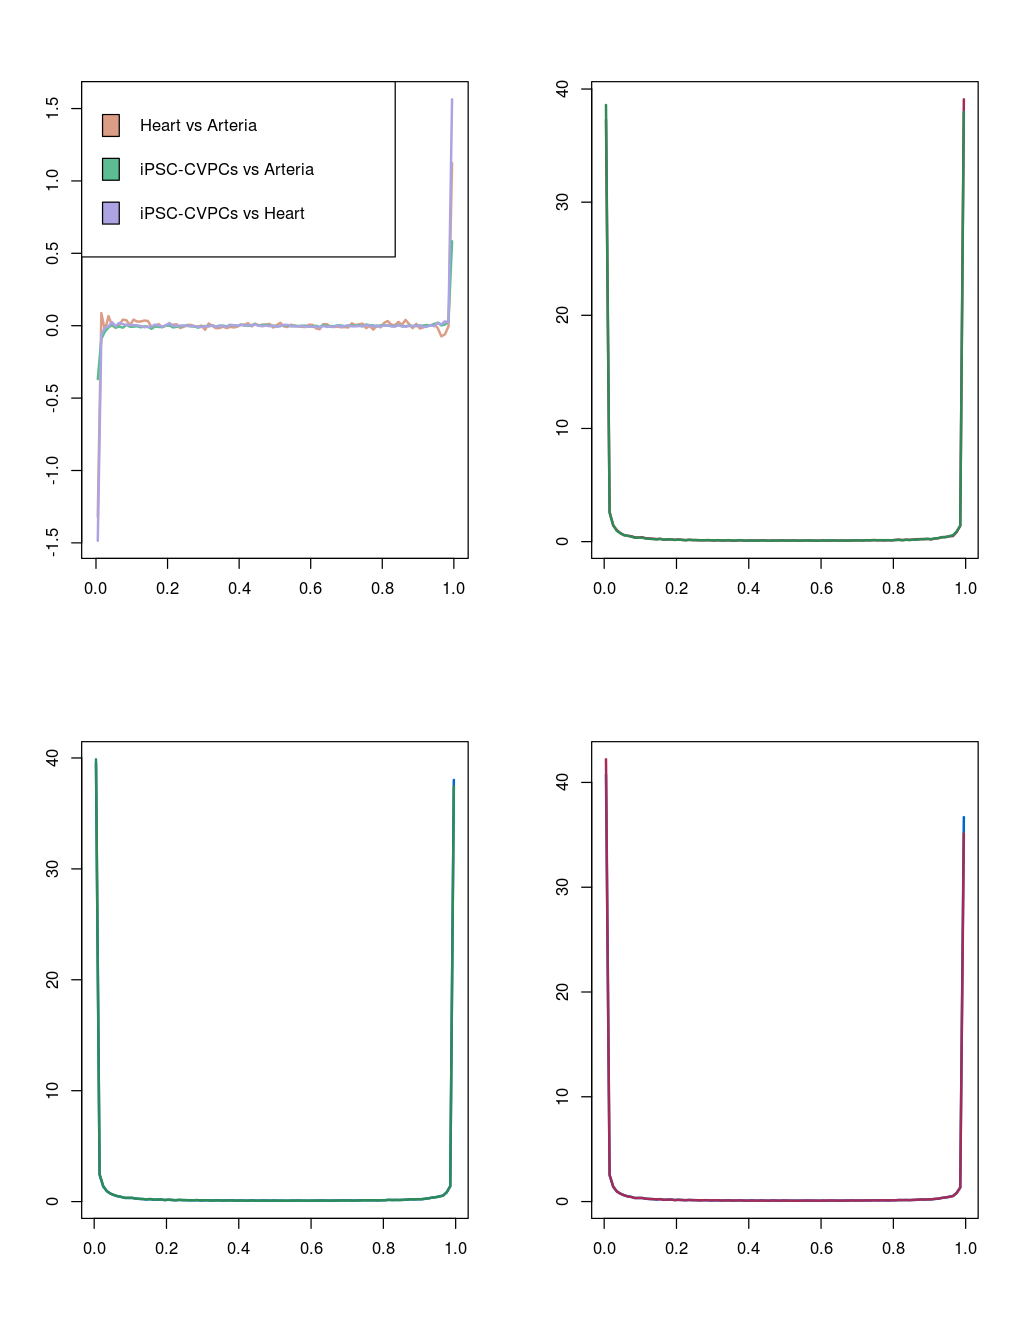

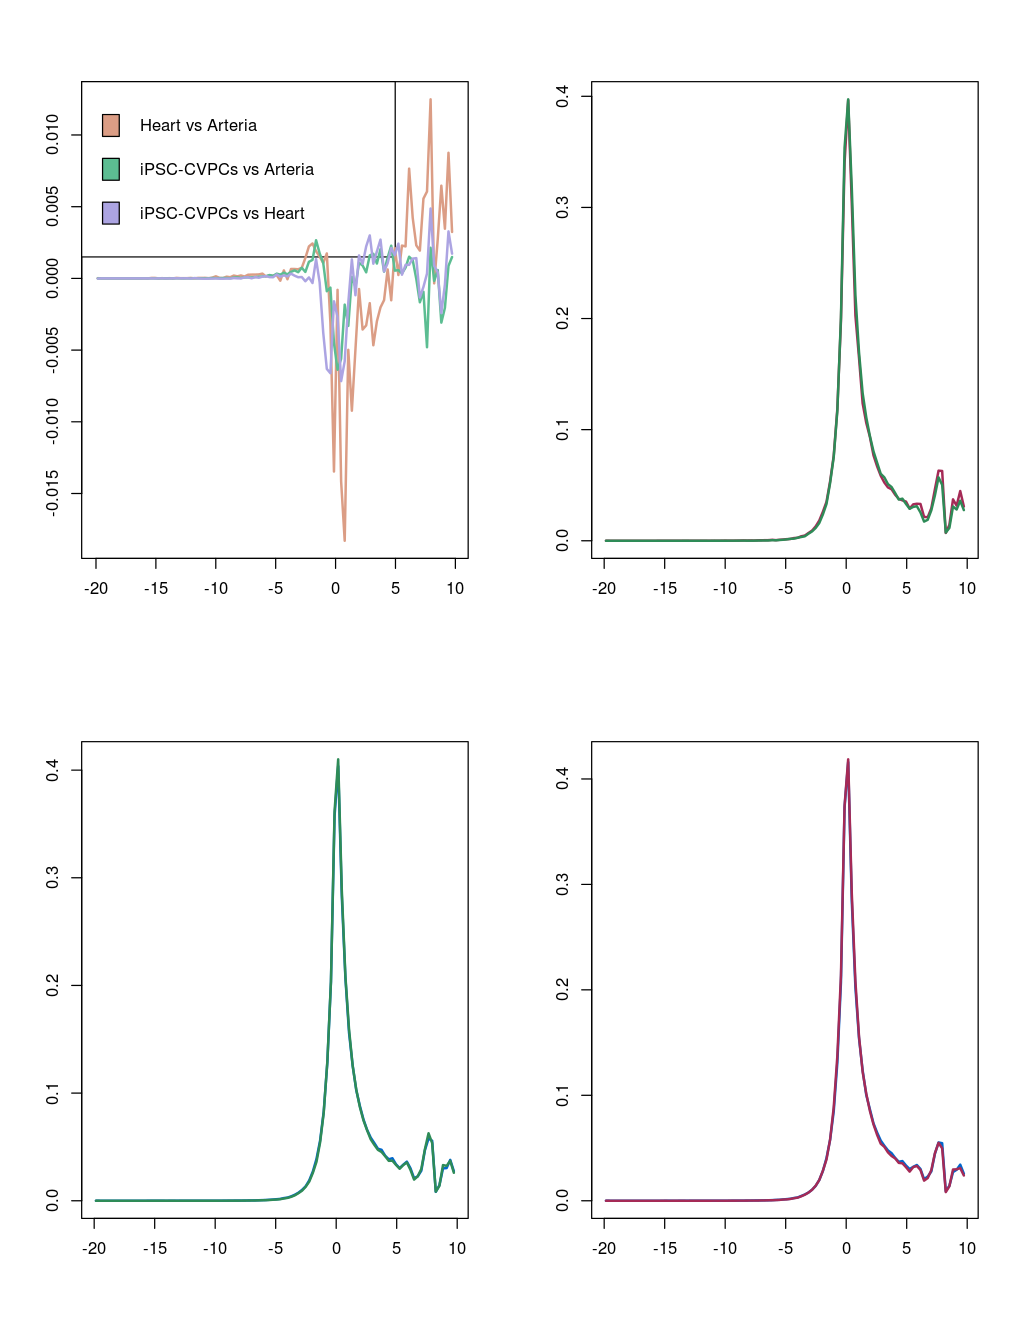

In [395]:
tis2col       = tissues
tis2col$name  = paste(tissue2color3[tis2col$tissue1, "body_site"], "vs", tissue2color3[tis2col$tissue2, "body_site"])
tis2col$color = qualitative_hcl(n = nrow(tis2col), palette = "Dynamic")

options(repr.plot.width = 8.5, repr.plot.height = 11)
layout(rbind(1:2, 3:4))


for (bigwig in bigwigs$bigwig)
{
    myrange = range(unlist(lapply(tracks[[bigwig]], function(x){range(x)})))
    
    
    plot(1,1, type = "n", xlim = myrange, ylim = range(unlist(lapply(tests, function(x){range(x[[bigwig]][["hist"]][,"delta"])}))), xlab = "", ylab = "")
    legend("topleft", legend = tis2col$name, fill = tis2col$color)

    for(ii in 1:nrow(tis2col))
    {
        name  = tis2col[ii, "name" ]
        color = tis2col[ii, "color"]

        this  = tests[[ii]][[bigwig]][["hist"]]

        lines(x  = this$mids, y = this$delta, col = color, lwd = 2)
    }
    
    for(ii in 1:nrow(tis2col))
    {
        name  = tis2col[ii, "name" ]
        color = tis2col[ii, "color"]

        this  = tests[[ii]][[bigwig]][["hist"]]

        plot(1,1, type = "n", xlim = range(this$mids), ylim = range(c(this$density1, this$density2)), xlab = "", ylab = "")
        lines(x  = this$mids, y = this$density1, col = tissue2color3[ tis2col[ii, "tissue1"], "color"], lwd = 2)
        lines(x  = this$mids, y = this$density2, col = tissue2color3[ tis2col[ii, "tissue2"], "color"], lwd = 2)
    }
    
    
}


In [396]:
lapply(tests, function(x){range(x[[bigwig]][["hist"]][,"delta"])})
as.data.frame(rbindlist(lapply(tests, function(x){x[["phastcons"]][["test"]]})), stringsAsFactors = FALSE)
as.data.frame(rbindlist(lapply(tests, function(x){x[["phylop"   ]][["test"]]})), stringsAsFactors = FALSE)


[[1]]
[1] -0.01829428  0.01248635

[[2]]
[1] -0.006370920  0.002661741

[[3]]
[1] -0.007163503  0.004872421

tissue1,tissue2,tissue1_mean,tissue2_mean,pval,x11,x12,x21,x22,pval_fisher,estimate,ci1,ci2
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
heart,arteria,0.4911482,0.4807744,5.945674e-18,100717,105597,115948,126603,1.263757e-11,1.041459,1.029247,1.053756
ipsc_cvpc,arteria,0.4772571,0.4709982,1.201659e-12,995582,1103740,537787,611637,4.358301e-28,1.025881,1.021199,1.030540
ipsc_cvpc,heart,0.4621201,0.4466222,3.579399e-167,858946,1013711,432634,542843,1.413455e-131,1.063145,1.057936,1.068447


tissue1,tissue2,tissue1_mean,tissue2_mean,pval,x11,x12,x21,x22,pval_fisher,estimate,ci1,ci2
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
heart,arteria,1.822604,1.708154,8.771751e-12,33781,172533,34644,207907,9.154722e-84,1.175006,1.1559943,1.1943257
ipsc_cvpc,arteria,1.736613,1.745144,8.673933e-02,326358,1772964,179716,969708,3.362369e-02,0.993226,0.9870017,0.9995019
ipsc_cvpc,heart,1.664801,1.617139,2.555313e-45,280329,1592328,141657,833820,5.151858e-24,1.036266,1.0290862,1.0434599


In [348]:
tissues

,tissue1,tissue2
,<chr>,<chr>
1,heart,arteria
5,ipsc_cvpc,arteria
6,ipsc_cvpc,heart


In [378]:
str(tests)

List of 3
 $ :List of 2
  ..$ phastcons:List of 3
  .. ..$ hist   :'data.frame':	100 obs. of  7 variables:
  .. .. ..$ mids    : num [1:100] 0.005 0.015 0.025 0.035 0.045 0.055 0.065 0.075 0.085 0.095 ...
  .. .. ..$ counts1 : int [1:100] 76888 5416 2942 2096 1531 1170 1069 990 777 749 ...
  .. .. ..$ density1: num [1:100] 37.267 2.625 1.426 1.016 0.742 ...
  .. .. ..$ counts2 : int [1:100] 93594 6156 3542 2303 1798 1412 1246 1062 822 872 ...
  .. .. ..$ density2: num [1:100] 38.587 2.538 1.46 0.949 0.741 ...
  .. .. ..$ log2r   : num [1:100] -0.05021 0.04868 -0.03432 0.09757 0.00153 ...
  .. .. ..$ delta   : num [1:100] -1.319883 0.087102 -0.03433 0.066436 0.000785 ...
  .. ..$ test   :'data.frame':	1 obs. of  5 variables:
  .. .. ..$ tissue1     : chr "heart"
  .. .. ..$ tissue2     : chr "arteria"
  .. .. ..$ tissue1_mean: num 0.491
  .. .. ..$ tissue2_mean: num 0.481
  .. .. ..$ pval        : num 5.95e-18
  .. ..$ tolines:'data.frame':	100 obs. of  2 variables:
  .. .. ..$ x: num [

## Hypoxia

In [244]:
enrtiss = fread("pipeline/4.1.differential_expression/functional_enrichment.tissue.txt", sep = "\t", header = TRUE, data.table = FALSE)
enrtiss$gene_set = tolower(enrtiss$gene_set)

In [275]:
hypoxia = enrtiss[grepl("ypox", enrtiss$gene_set) == TRUE | grepl("hif", enrtiss$gene_set) == TRUE, c("tissue1" ,"tissue2", "type", "gs_source", "gene_set", "ttest_ci1", "ttest_ci2", "ttest_pval", "ttest_fdr")]
hypoxia = hypoxia[order(hypoxia$ttest_pval),]

respiration = enrtiss[grepl("respir", enrtiss$gene_set) == TRUE, c("tissue1" ,"tissue2", "type", "gs_source", "gene_set", "ttest_ci1", "ttest_ci2", "ttest_pval", "ttest_fdr")]
respiration = respiration[order(respiration$ttest_pval),]

glycolysis = enrtiss[grepl("glycolysis", enrtiss$gene_set) == TRUE, c("tissue1" ,"tissue2", "type", "gs_source", "gene_set", "ttest_ci1", "ttest_ci2", "ttest_pval", "ttest_fdr")]
glycolysis = glycolysis[order(glycolysis$ttest_pval),]

lactate = enrtiss[grepl("lact", enrtiss$gene_set) == TRUE, c("tissue1" ,"tissue2", "type", "gs_source", "gene_set", "ttest_ci1", "ttest_ci2", "ttest_pval", "ttest_fdr")]
lactate = lactate[order(lactate$ttest_pval),]

pyruvate_dehydrogenase = enrtiss[grepl("pyruvate_dehydrogenase", enrtiss$gene_set) == TRUE, c("tissue1" ,"tissue2", "type", "gs_source", "gene_set", "ttest_ci1", "ttest_ci2", "ttest_pval", "ttest_fdr")]
pyruvate_dehydrogenase = pyruvate_dehydrogenase[order(pyruvate_dehydrogenase$ttest_pval),]

glucose = enrtiss[grepl("glucose", enrtiss$gene_set) == TRUE, c("tissue1" ,"tissue2", "type", "gs_source", "gene_set", "ttest_ci1", "ttest_ci2", "ttest_pval", "ttest_fdr")]
glucose = glucose[order(glucose$ttest_pval),]

metabolism = enrtiss[grepl("metabol", enrtiss$gene_set) == TRUE, c("tissue1" ,"tissue2", "type", "gs_source", "gene_set", "ttest_ci1", "ttest_ci2", "ttest_pval", "ttest_fdr")]
metabolism = metabolism[order(metabolism$ttest_pval),]


In [276]:
list_gene_sets = list(
    metabolism             = metabolism            [metabolism            $ttest_fdr < 0.05,],
    glucose                = glucose               [glucose               $ttest_fdr < 0.05,],
    pyruvate_dehydrogenase = pyruvate_dehydrogenase[pyruvate_dehydrogenase$ttest_fdr < 0.05,],
    lactate                = lactate               [lactate               $ttest_fdr < 0.05,],
    glycolysis             = glycolysis            [glycolysis            $ttest_fdr < 0.05,],
    respiration            = respiration           [respiration           $ttest_fdr < 0.05,],
    hypoxia                = hypoxia               [hypoxia               $ttest_fdr < 0.05,]
)

list_gene_sets

,tissue1,tissue2,type,gs_source,gene_set,ttest_ci1,ttest_ci2,ttest_pval,ttest_fdr
,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
2308,ipsc_cvpc,heart,gene_tpm,c2.cp.reactome,reactome_metabolism_of_rna,0.5621294,0.7136375,2.737499e-52,1.330589e-48
2309,ipsc_cvpc,arteria,gene_tpm,c2.cp.reactome,reactome_metabolism_of_rna,0.5257048,0.7021014,6.130733e-38,9.933013e-35
14377,ipsc_cvpc,heart,gene_tpm,c5.bp,go_mrna_metabolic_process,0.4265693,0.5823604,5.046696e-34,5.934670e-31
15273,heart,arteria,gene_tpm,c5.bp,go_generation_of_precursor_metabolites_and_energy,0.5332077,0.7214279,6.164760e-34,7.134389e-31
17254,ipsc_cvpc,heart,gene_tpm,c5.bp,go_dna_metabolic_process,0.4339271,0.5943659,1.481074e-33,1.661287e-30
17255,ipsc_cvpc,arteria,gene_tpm,c5.bp,go_dna_metabolic_process,0.4320965,0.6158899,2.605486e-27,1.860148e-24
22167,heart,arteria,gene_tpm,c5.bp,go_atp_metabolic_process,0.6145728,0.8589765,1.185483e-26,8.077792e-24
11513,ipsc_cvpc,arteria,gene_tpm,c5.bp,go_ncrna_metabolic_process,0.5068114,0.7267712,2.822850e-25,1.686977e-22
7929,heart,arteria,gene_tpm,c5.bp,go_small_molecule_metabolic_process,0.2187849,0.3191762,3.734921e-25,2.196043e-22
